In [1]:
%matplotlib inline

In [2]:
import tensorflow as tf
import zipfile
import os
import pandas as pd
import numpy as np
import pathlib
import datetime
from collections import Counter
import copy
import matplotlib.pyplot as plt
import time


/home/muhammadayub/anaconda3/envs/py35-2/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


# Helpful Functions

In [4]:
def cleanURL(url):
    p = pathlib.Path(url)
    path = str(p.as_posix()) 
    return path 


def getDF(loc, sheetname):
    dataframe = pd.read_excel(loc, sheetname)
    #https://stackoverflow.com/questions/40950310/strip-trim-all-strings-of-a-dataframe
    dataframe = dataframe.applymap(lambda x: x.strip() if type(x) is str else x)
    return dataframe

def printNulls(df):
    null_columns = df.columns[df.isnull().any()]
    return df[null_columns].isnull().sum() 


def writeDFToFile(dfs, path_): #dfs is an array of dataframes and their sheet names , path needs to have
    time_ = str(datetime.datetime.now())
    current_date_time = time_[0:time_.index(".")]
    current_date_time = current_date_time.replace(":", "-")
    task4_fileoutput = path_+current_date_time+".xlsx"

    writer = pd.ExcelWriter(task4_fileoutput)
    
    for df_tuple in dfs:  
        df = df_tuple[0]
        sheetName = df_tuple[1]
        df.to_excel(writer, sheetName)
    print("file written to :       " + task4_fileoutput)
    writer.save()
    
def plotImg(img):
    if(type(img) ==type(None)):
        img =outputsDataReal[10000]
    arr = []
    for a in img:
        arr = [a] + arr
    plt.pcolor( arr, cmap = 'gist_ncar' )

    plt.show()    

cwd = os.getcwd()
cwd

'/home/muhammadayub/Desktop/CS230/Notebooks/re'

# Load Data

In [51]:
CATEGORY_AMT =34

In [54]:
base_filepath = "/home/muhammadayub/Desktop/CS230/training_data/minibatches_real/"

a_ = time.time()

inputData = []
outputData = []

for i_ in range(374):
    
    inputPath = base_filepath+'input_'+str(i_)+"_.npy"
    outputPath = base_filepath+'output_'+str(i_)+"_.npy"
    
    inputMinibatch = np.load(inputPath, mmap_mode = 'r')
    outputMinibatch = np.load(outputPath, mmap_mode = 'r')
    
    oneHotVectors = np.zeros(shape=( len(outputMinibatch), CATEGORY_AMT ))
    
    
    for x_ , img in enumerate(outputMinibatch):
        cCount = Counter(img.flatten())
        mC = cCount.most_common()
        
        if(len(mC) == 2):
            if(mC[0][0] == -1):
                oneHotVectors[x_][int(mC[1][0])] = 1
            else:
                print("oh no-> assumption doesn't hold true . Recode")
        elif(len(mC) == 3):
            if(mC[0][0] == -1):
                oneHotVectors[x_][int(mC[1][0])] = .5
                oneHotVectors[x_][int(mC[2][0])] = .5
            else:
                print("oh no-> assumption doesn't hold true . Recode")
        elif(len(mC) == 4):
            if(mC[0][0] == -1):
                oneHotVectors[x_][int(mC[1][0])] = .33
                oneHotVectors[x_][int(mC[2][0])] = .34
                oneHotVectors[x_][int(mC[3][0])] = .33
            else:
                print("oh no-> assumption doesn't hold true . Recode")
        elif(len(mC) == 5):
            if(mC[0][0] == -1):
                oneHotVectors[x_][int(mC[1][0])] = .25
                oneHotVectors[x_][int(mC[2][0])] = .25
                oneHotVectors[x_][int(mC[3][0])] = .25
                oneHotVectors[x_][int(mC[4][0])] = .25
            else:
                print("oh no-> assumption doesn't hold true . Recode")
        elif(len(mC) == 6):
            if(mC[0][0] == -1):
                oneHotVectors[x_][int(mC[1][0])] = .2
                oneHotVectors[x_][int(mC[2][0])] = .2
                oneHotVectors[x_][int(mC[3][0])] = .2
                oneHotVectors[x_][int(mC[4][0])] = .2
                oneHotVectors[x_][int(mC[5][0])] = .2
            else:
                print("oh no-> assumption doesn't hold true . Recode")
        
        
    inputData.append(inputMinibatch)
    outputData.append(oneHotVectors)
    
    
b_ = time.time()
   
print(b_-a_)

313.26456665992737


In [63]:
print(inputData[0].shape)
print(outputData[0].shape)
outputData[0][0]

inputs = None
outputs = None 

inputs = np.concatenate(inputData, axis = 0)
outputs = np.concatenate(outputData, axis = 0)

print(inputs.shape)
print(outputs.shape)

(200, 64, 64, 28)
(200, 34)
(74800, 64, 64, 28)
(74800, 34)


In [65]:
# inputs = None
# outputs = None 
np.set_printoptions(suppress=True)
abc = np.sum(outputs, axis = 0)
abcd = np.arange(len(abc))
print(abc)
print(abcd)

sorted2DArray = []

# [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
#  24 25 26 27 28 29 30 31 32 33]

[  7.06  69.45 203.42  64.43   0.    67.03 108.22  19.12 292.46   3.65
 339.75   0.     3.03   1.2    3.44   4.19 681.94 172.41   0.     0.
   0.     0.    49.87   0.   189.69  12.76   0.    14.49   0.    50.81
  50.42   0.33 562.63  10.2 ]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33]


In [50]:

np.sum(abc)
(abc/74800.)**-1

/home/muhammadayub/anaconda3/envs/py35-2/lib/python3.5/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in reciprocal
  


array([  9752.28161669,     29.27948205,      3.54622034,     31.8670785 ,
                   inf,   1138.16189897,      6.34858124,    998.66488652,
           47.30105732,  21250.        ,    219.93531314,             inf,
        26431.09540636,  90120.48192771,  21494.25287356,  25016.72240803,
           54.25125293,      9.62601392,             inf,             inf,
                   inf,             inf,   1212.90741041,             inf,
           44.37246771,   4716.26733922,             inf,   5000.        ,
                   inf,    245.89894474,   1488.26104258, 226666.66666667,
            3.16475646,   3410.85271318])

In [47]:
np.ones(34)
weights = np.array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [7]:
MINIBATCHES_AMT = 374
miniBatchIndices = np.arange(MINIBATCHES_AMT)
train_split = int(MINIBATCHES_AMT*.90)
dev_split = int(MINIBATCHES_AMT*.05)
test_split = MINIBATCHES_AMT - train_split - dev_split
print(train_split, dev_split, test_split )

336 18 20


In [8]:
np.random.shuffle(miniBatchIndices)
miniBatchIndices

array([308,  47, 204, 278, 176, 129, 274, 116, 181, 255, 369, 313, 128,
       306, 107, 122,  65,  12,   6, 285, 296,  64, 370, 343, 294, 357,
       185, 201, 289, 125, 305, 355, 371, 344, 105,  21, 214,  82, 177,
        36, 253,  35,  27, 164, 172, 162, 366, 269,   9, 309, 209,  71,
        91, 123, 338, 216, 353, 188, 243, 170, 151, 100,  83, 104, 297,
       295, 298,   3,  74, 118, 250, 148, 228, 364, 149, 259, 276, 166,
        22, 197, 268,  13, 272, 147,  69, 121, 334,  49,  59, 333,  88,
       349, 271, 182, 175, 282,  68, 284,  70, 341,  38, 328, 155, 270,
       225,  55, 131, 288, 332, 198, 300, 220,  31, 140,  52, 173, 254,
        84,  85, 290, 167, 318, 319, 208, 108,  81, 190, 335, 154, 192,
       351, 264,  32,  50,  75, 135, 193, 206, 286,  72,  93, 350, 307,
        45,   2, 256, 356, 202,  86, 196, 130,   7,  58, 304, 127,  78,
       302, 146, 327, 311, 329,  39,  87, 157,  28, 262, 159,  89,  19,
       171, 115,  37, 342,  41, 330, 138, 372,  63, 287, 273, 18

In [9]:

backup_minibatches = copy.deepcopy(miniBatchIndices)

devMiniBatches = copy.deepcopy(miniBatchIndices[train_split:train_split+dev_split])
testMiniBatches = copy.deepcopy(miniBatchIndices[train_split+dev_split:])# remove the last minibatch
minibatches = copy.deepcopy(miniBatchIndices[:train_split]) #training set  #must be at the end

# print(len(devMiniBatches+testMiniBatches+minibatches))
print(len(devMiniBatches), len(testMiniBatches) , len(minibatches))
print(devMiniBatches)
print(testMiniBatches)
print(minibatches)

np.save( '/home/muhammadayub/Desktop/CS230/models_saved/model5/devMiniBatches.npy' , devMiniBatches)
np.save( '/home/muhammadayub/Desktop/CS230/models_saved/model5/testMiniBatches.npy' , testMiniBatches)
np.save( '/home/muhammadayub/Desktop/CS230/models_saved/model5/minibatches.npy' , minibatches)

18 20 336
[101 134  26 102  92  77 293 263  53 152 299 126 347 345 124  15 217  30]
[361  42  40 246   0 133 365 168 179 340 194 200 237 292 239  62   4 207
 242 368]
[308  47 204 278 176 129 274 116 181 255 369 313 128 306 107 122  65  12
   6 285 296  64 370 343 294 357 185 201 289 125 305 355 371 344 105  21
 214  82 177  36 253  35  27 164 172 162 366 269   9 309 209  71  91 123
 338 216 353 188 243 170 151 100  83 104 297 295 298   3  74 118 250 148
 228 364 149 259 276 166  22 197 268  13 272 147  69 121 334  49  59 333
  88 349 271 182 175 282  68 284  70 341  38 328 155 270 225  55 131 288
 332 198 300 220  31 140  52 173 254  84  85 290 167 318 319 208 108  81
 190 335 154 192 351 264  32  50  75 135 193 206 286  72  93 350 307  45
   2 256 356 202  86 196 130   7  58 304 127  78 302 146 327 311 329  39
  87 157  28 262 159  89  19 171 115  37 342  41 330 138 372  63 287 273
 189 224 143 324 136 281 280 277 279 235 221  10 260 226 265 180 120 213
 103  24 326  29 367   5 283 1

# Model Definition (based off research paper)

In [55]:
def create_placeholders(n_H0, n_W0, n_C0, n_y):
    """
    Creates the placeholders for the tensorflow session.
    
    Arguments:
    n_H0 -- scalar, height of an input image
    n_W0 -- scalar, width of an input image
    n_C0 -- scalar, number of channels of the input
    n_y -- scalar, number of classes
        
    Returns:
    X -- placeholder for the data input, of shape [None, n_H0, n_W0, n_C0] and dtype "float"
    Y -- placeholder for the input labels, of shape [None, n_y] and dtype "float"
    """


    X = tf.placeholder(shape =[None, n_H0, n_W0, n_C0], dtype = np.float32, name="X")
    Y = tf.placeholder(shape  =[None, n_y], dtype = np.float32 , name="Y")
    ### END CODE HERE ###
    
    return X, Y

In [56]:
X, Y = create_placeholders(64, 64, 26, CATEGORY_AMT)  #will have 35 , 34 real values and 1 fake value
print ("X = " + str(X))
print ("Y = " + str(Y))


X = Tensor("X_1:0", shape=(?, 64, 64, 26), dtype=float32)
Y = Tensor("Y_1:0", shape=(?, 34), dtype=float32)


## First CNN Trial

### First filter shape: (10 , 10,3 , 3) stride = 2, valid padding
    
    (64 +2p - f)/s +1 => (64+0-10)/2+1 = 28
    So, (?, 64, 64, 3) * (10 , 10 , 3,  3) = (?, 28, 28, 3 )
    
### Average Pooling Layer: (3 , 3 , 3) stride = 1, Padding = SAME
    
    (28 +2p - f)/s +1 => (28+2*1-3)/1+1 = 28
    So, (?, 28, 28, 3) * ( 3 , 3,  3) = (?, 28, 28, 3 )
    
    
### Second filter shape: (6 , 6 ,3, 2) stride = 2, valid padding
    
    (28 +2p - f)/s +1 => (28+0-6)/2+1 = 12
    So, (?, 28, 28, 3) * (6 , 6 , 3, 2) = (?, 12, 12, 2)
    
### Max Pooling layer valid padding stride 1 (3,3)
    
    (12 +2p - f)/s +1 => (12+0-3)/1+1 = 10
    So, (?, 12,12, 2) * (3, 3 , 2, 2) = (?, 10, 10, 2)

    
### Fourth filter shape: Flatten , fully connected (10*10*2) = 200
    
    W3 = 36 by 200
    
### Softmax function for evaluation    


In [57]:
def initialize_parameters():    

    W1 = tf.get_variable("W1", [10, 10, 28, 3], initializer =tf.contrib.layers.xavier_initializer(seed = 0))
    W2 = tf.get_variable("W2", [6, 6, 3, 2], initializer =tf.contrib.layers.xavier_initializer(seed = 0))
    W3 = tf.get_variable("W3", [35,200] , initializer =tf.contrib.layers.xavier_initializer(seed = 0) )

    parameters = {"W1": W1, "W2": W2 , 'W3': 'W3'}
    
    return parameters

In [58]:
def forward_prop(X, params):
    W1 = params['W1']
    W2 = params['W2']    
    W3 = params['W3']
    
    #convolution 
    Z1 = tf.nn.conv2d(X,W1, strides = [1,2,2,1], padding = 'VALID')
    
    #bias added automatically # RELU
    A1 = tf.nn.relu(Z1)
    
    #average pooling -> at this point all features/weights are important to us
    P1 = tf.nn.avg_pool(A1, ksize = [1,3,3,1], strides = [1,1,1,1], padding = 'SAME')

    # convolution 
    Z2 = tf.nn.conv2d(P1,W2, strides = [1,2,2,1], padding = 'VALID')
    
    #RELU
    A2 = tf.nn.relu(Z2)
    
    #max pooling
    P2 = tf.nn.max_pool(A2, ksize = [1,3,3,1], strides = [1,1,1,1], padding = 'VALID')
    
    #flatten
    P2 = tf.contrib.layers.flatten(P2)

    #fully connected
    Z3 = tf.contrib.layers.fully_connected(P2, CATEGORY_AMT, activation_fn = None) #1 for yes/no
    #going to add the softmax directly

    return Z3

# Run or Train the model

In [15]:
# tf.reset_default_graph()
asd=True==werwe
base_filepath = "/home/muhammadayub/Desktop/CS230/models_saved/model5/"
filepath =None # put in global namespace for ease of using later
learning_rate = .003
costs = []
num_epochs = 200


graph = tf.Graph()
with graph.as_default(): # https://stackoverflow.com/questions/36281129/no-variable-to-save-error-in-tensorflow

    #variable declarations must be before tf.train.Saver() unless here: https://stackoverflow.com/questions/50974976/tensorflow-why-must-saver-tf-train-saver-be-declared-after-variables-are
    #the model
    X, Y = create_placeholders(64, 64, 28, CATEGORY_AMT)
    parameters = initialize_parameters()
    Z3 = forward_prop(X, parameters)

    cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits = Z3, labels = Y))
    optimizer = tf.train.AdamOptimizer(learning_rate = learning_rate).minimize(cost)#1e-4).minimize(cross_entropy)

    
    saver = tf.train.Saver()

    # # Initialize all the variables globally
    # init = tf.global_variables_initializer()

    # Start the session to compute the tensorflow graph
    with tf.Session() as sess:


        #init must be after optimizer
        init = tf.global_variables_initializer()

        # Run the initialization
        sess.run(init)
        print('Starting ' , datetime.datetime.now())
        # Do the training loop
        for epoch in range(num_epochs):

            minibatch_cost = 0.
            np.random.shuffle(minibatches) # get new minibatch results 

            for i_ in minibatches:

                # Select a minibatch
                output_image64 = outputData[i_]
                inputImage64 =inputData[i_]


                # IMPORTANT: The line that runs the graph on a minibatch.
                # Run the session to execute the optimizer and the cost, the feedict should contain a minibatch for (X,Y).
                ### START CODE HERE ### (1 line)
                _ , temp_cost = sess.run([optimizer,cost], feed_dict={X: inputImage64, Y: output_image64})
                ### END CODE HERE ###

                minibatch_cost += temp_cost / MINIBATCHES_AMT

                print('Minibatch End: ', datetime.datetime.now())
                print(temp_cost,' ' , epoch,' ' ,i_)
                
                if(i_ % 20 == 0 ):
                    #save model
                    filepath = base_filepath+"/model3_12_9__"+str(epoch)+"_"+str(i_)+".ckpt"
                    print(temp_cost, " at file name: ", filepath[25:])
                    save_path = saver.save(sess, filepath)

            costs.append(minibatch_cost)
            print('Epoch End: ', datetime.datetime.now())


# if((epoch ==0) and (i_==0)):
#     globalA = inputImage64     #model5/model3_12_9__541_160.ckpt
#     globalB = output_image64

NameError: name 'werwe' is not defined

288

# Storing the Costs, etc. 

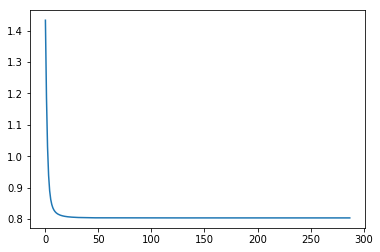

In [62]:
costsNPArray = np.array(costs)
epochXaxis = np.arange(len(costs))
plt.plot(epochXaxis, costsNPArray)
plt.show()

costsFilePath = '/home/muhammadayub/Desktop/CS230/models_saved/model5/COSTS___5b'+'.npy'    #COSTS___12_12_2018'+'.npy'
np.save(costsFilePath, costsNPArray )

In [149]:
np.load(costsFilePath)
# filepath

array([0.0647672 , 0.04641966, 0.03471443, 0.02663976, 0.02192029,
       0.01970959, 0.01845553, 0.01755938, 0.0171982 , 0.01660422,
       0.01654085, 0.01634365, 0.01621262, 0.01652126, 0.01615006,
       0.0159698 , 0.01614199, 0.01610396, 0.01610836, 0.01620547,
       0.01587727, 0.01573968, 0.01584721, 0.01606645, 0.01579885,
       0.01592844, 0.01588698, 0.01569943, 0.01565967, 0.01583383,
       0.01620939, 0.02880385, 0.02278177, 0.02216931, 0.02250067,
       0.02267798, 0.02239106, 0.02253839, 0.02259601, 0.02280519,
       0.02219826, 0.022607  , 0.0226754 , 0.02211113, 0.02231681,
       0.02226554, 0.02251199, 0.02253624, 0.02265881, 0.02246234])

# This is to figure out the F1 multi class label predictions 

# Restoring the Model

In [ ]:
minibatches

In [26]:
# this is to make minibatches larger
print(len(minibatches), ' is number of training minibatches') # is even number

doubleMinibatches = np.split(minibatches, int(len(minibatches)/2))
for i_ in doubleMinibatches:
    print(i_[0], i_[1])

336  is number of training minibatches
308 47
204 278
176 129
274 116
181 255
369 313
128 306
107 122
65 12
6 285
296 64
370 343
294 357
185 201
289 125
305 355
371 344
105 21
214 82
177 36
253 35
27 164
172 162
366 269
9 309
209 71
91 123
338 216
353 188
243 170
151 100
83 104
297 295
298 3
74 118
250 148
228 364
149 259
276 166
22 197
268 13
272 147
69 121
334 49
59 333
88 349
271 182
175 282
68 284
70 341
38 328
155 270
225 55
131 288
332 198
300 220
31 140
52 173
254 84
85 290
167 318
319 208
108 81
190 335
154 192
351 264
32 50
75 135
193 206
286 72
93 350
307 45
2 256
356 202
86 196
130 7
58 304
127 78
302 146
327 311
329 39
87 157
28 262
159 89
19 171
115 37
342 41
330 138
372 63
287 273
189 224
143 324
136 281
280 277
279 235
221 10
260 226
265 180
120 213
103 24
326 29
367 5
283 169
203 215
95 158
275 161
360 322
331 219
267 44
33 76
99 14
184 25
145 346
231 139
240 261
316 238
258 244
80 195
43 34
18 109
229 266
352 94
156 110
51 314
174 17
66 1
359 97
199 96
212 90
257 232
3

In [66]:
filepath = "/home/muhammadayub/Desktop/CS230/models_saved/model5/model3_12_123__288_120.ckpt"
base_filepath = "/home/muhammadayub/Desktop/CS230/models_saved/model5/"

learning_rate = .004
costs = []
num_epochs = 150

graph = tf.Graph()
with graph.as_default(): 
    with tf.Session(graph=graph) as sess:
        
        #define the graph
        X, Y = create_placeholders(64, 64, 28, CATEGORY_AMT)
        parameters = initialize_parameters()
        Z3 = forward_prop(X, parameters)
        #optimization 
        cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits = Z3, labels = Y))
        optimizer = tf.train.AdamOptimizer(learning_rate = learning_rate).minimize(cost)#1e-4).minimize(cross_entropy)

        #calculating the accuracy of the model 
        softmaxZ3 = tf.nn.softmax(Z3) # size will be 2200, 34
        output_class = tf.argmax(softmaxZ3,1) # size will be 2200, 1 or just (2200,)
        num_correct = tf.equal(output_class, tf.argmax(Y,1)) # must compare 2200
        num_correct_to_int = tf.cast(num_correct, tf.float32)
        accuracy = tf.reduce_mean(num_correct_to_int)
        
        
        saver = tf.train.Saver()

        saver.restore(sess , filepath)
        print("Model restored.")
        

        #init must be after optimizer
        init = tf.global_variables_initializer()

        # Run the initialization
        sess.run(init)
        print('Starting ' , datetime.datetime.now())
        # Do the training loop
        for epoch in range(num_epochs):

            minibatch_cost = 0.
            np.random.shuffle(doubleMinibatches) # get new minibatch results 
            
            countOfMinibatch = 0 
            for i_ in doubleMinibatches:
                
                # Select a minibatch
                output_image64_a = outputData[i_[0]]
                output_image64_b = outputData[i_[1]]
                
                inputImage64_a =inputData[i_[0]]
                inputImage64_b =inputData[i_[1]]

                output_image64 = np.concatenate([output_image64_a, output_image64_b], axis = 0)
                inputImage64 =  np.concatenate([inputImage64_a, inputImage64_b], axis = 0)
                
                # IMPORTANT: The line that runs the graph on a minibatch.
                # Run the session to execute the optimizer and the cost, the feedict should contain a minibatch for (X,Y).
                ### START CODE HERE ### (1 line)
                _ , temp_cost = sess.run([optimizer,cost], feed_dict={X: inputImage64, Y: output_image64})
                ### END CODE HERE ###

                minibatch_cost += temp_cost / MINIBATCHES_AMT

                print('Minibatch End: ', datetime.datetime.now())
                print(temp_cost,' ' , epoch,' ' ,countOfMinibatch)
                
                if(countOfMinibatch % 20 == 0 ):
                    #save model
                    filepath = base_filepath+"/model3_12_13__"+str(epoch)+"_"+str(countOfMinibatch)+".ckpt"
                    print(temp_cost, " at file name: ", filepath[25:])
                    save_path = saver.save(sess, filepath)

                countOfMinibatch+=1
                
            costs.append(minibatch_cost)
            print('Epoch End: ', datetime.datetime.now())
        
        

INFO:tensorflow:Restoring parameters from /home/muhammadayub/Desktop/CS230/models_saved/model5/model3_12_123__288_120.ckpt
Model restored.
Starting  2018-12-13 10:30:45.787984
Minibatch End:  2018-12-13 10:30:46.874644
0.0   0   0
0.0  at file name:  p/CS230/models_saved/model5//model3_12_13__0_0.ckpt
Minibatch End:  2018-12-13 10:30:48.572609
0.0   0   1
Minibatch End:  2018-12-13 10:30:49.584003
1.0582026   0   2
Minibatch End:  2018-12-13 10:30:51.300053
0.0   0   3
Minibatch End:  2018-12-13 10:30:52.994818
0.017621817   0   4
Minibatch End:  2018-12-13 10:30:53.997077
0.0   0   5
Minibatch End:  2018-12-13 10:30:56.496043
0.0   0   6
Minibatch End:  2018-12-13 10:30:58.222807
0.0   0   7
Minibatch End:  2018-12-13 10:30:59.225927
0.0   0   8
Minibatch End:  2018-12-13 10:31:00.619117
0.008805012   0   9
Minibatch End:  2018-12-13 10:31:04.802828
0.0   0   10
Minibatch End:  2018-12-13 10:31:05.809103
0.0   0   11
Minibatch End:  2018-12-13 10:31:06.854219
0.0   0   12
Minibatch En

Minibatch End:  2018-12-13 10:34:07.668935
0.0   0   128
Minibatch End:  2018-12-13 10:34:09.366684
0.01762651   0   129
Minibatch End:  2018-12-13 10:34:11.086572
0.017556973   0   130
Minibatch End:  2018-12-13 10:34:12.883030
0.00838094   0   131
Minibatch End:  2018-12-13 10:34:14.646131
0.008870477   0   132
Minibatch End:  2018-12-13 10:34:17.035448
0.0089026   0   133
Minibatch End:  2018-12-13 10:34:18.813205
0.026584173   0   134
Minibatch End:  2018-12-13 10:34:20.546443
0.0   0   135
Minibatch End:  2018-12-13 10:34:22.983466
0.01777773   0   136
Minibatch End:  2018-12-13 10:34:24.700244
0.0   0   137
Minibatch End:  2018-12-13 10:34:27.231426
0.017358677   0   138
Minibatch End:  2018-12-13 10:34:29.704497
0.017207762   0   139
Minibatch End:  2018-12-13 10:34:32.201123
0.0   0   140
0.0  at file name:  p/CS230/models_saved/model5//model3_12_13__0_140.ckpt
Minibatch End:  2018-12-13 10:34:34.799649
0.0   0   141
Minibatch End:  2018-12-13 10:34:37.226447
0.0   0   142
Mini

Minibatch End:  2018-12-13 10:37:39.537472
0.008320715   1   88
Minibatch End:  2018-12-13 10:37:41.272053
0.0   1   89
Minibatch End:  2018-12-13 10:37:43.016081
0.0   1   90
Minibatch End:  2018-12-13 10:37:44.817549
1.6892395   1   91
Minibatch End:  2018-12-13 10:37:45.922102
0.008318185   1   92
Minibatch End:  2018-12-13 10:37:47.581731
1.6945957   1   93
Minibatch End:  2018-12-13 10:37:48.577113
0.026641548   1   94
Minibatch End:  2018-12-13 10:37:50.267186
0.0   1   95
Minibatch End:  2018-12-13 10:37:51.989665
0.016608773   1   96
Minibatch End:  2018-12-13 10:37:53.775608
0.008913595   1   97
Minibatch End:  2018-12-13 10:37:55.444994
0.008058155   1   98
Minibatch End:  2018-12-13 10:37:57.117238
0.008832515   1   99
Minibatch End:  2018-12-13 10:37:58.865737
0.0   1   100
0.0  at file name:  p/CS230/models_saved/model5//model3_12_13__1_100.ckpt
Minibatch End:  2018-12-13 10:38:00.331892
0.008855276   1   101
Minibatch End:  2018-12-13 10:38:01.335594
0.0   1   102
Minibat

Minibatch End:  2018-12-13 10:41:08.949725
1.6806533   2   49
Minibatch End:  2018-12-13 10:41:10.685296
0.0   2   50
Minibatch End:  2018-12-13 10:41:12.430641
0.0   2   51
Minibatch End:  2018-12-13 10:41:13.427963
1.6910827   2   52
Minibatch End:  2018-12-13 10:41:15.136990
1.6935086   2   53
Minibatch End:  2018-12-13 10:41:16.147931
0.0   2   54
Minibatch End:  2018-12-13 10:41:17.163822
0.0   2   55
Minibatch End:  2018-12-13 10:41:18.912211
0.0   2   56
Minibatch End:  2018-12-13 10:41:19.905980
0.03360348   2   57
Minibatch End:  2018-12-13 10:41:20.896564
0.0   2   58
Minibatch End:  2018-12-13 10:41:21.897492
0.0   2   59
Minibatch End:  2018-12-13 10:41:22.899146
0.0   2   60
0.0  at file name:  p/CS230/models_saved/model5//model3_12_13__2_60.ckpt
Minibatch End:  2018-12-13 10:41:24.269184
0.0   2   61
Minibatch End:  2018-12-13 10:41:25.269905
0.0   2   62
Minibatch End:  2018-12-13 10:41:26.286407
0.0   2   63
Minibatch End:  2018-12-13 10:41:27.289217
0.016889483   2   6

Minibatch End:  2018-12-13 10:44:33.530715
0.008815866   3   9
Minibatch End:  2018-12-13 10:44:34.524095
0.0   3   10
Minibatch End:  2018-12-13 10:44:35.521521
0.0   3   11
Minibatch End:  2018-12-13 10:44:36.528736
0.0   3   12
Minibatch End:  2018-12-13 10:44:37.516196
0.0   3   13
Minibatch End:  2018-12-13 10:44:38.525000
0.008953788   3   14
Minibatch End:  2018-12-13 10:44:40.914853
0.0   3   15
Minibatch End:  2018-12-13 10:44:42.599405
0.0   3   16
Minibatch End:  2018-12-13 10:44:43.598868
0.0   3   17
Minibatch End:  2018-12-13 10:44:44.599572
0.0   3   18
Minibatch End:  2018-12-13 10:44:45.602301
0.0   3   19
Minibatch End:  2018-12-13 10:44:46.603908
0.0   3   20
0.0  at file name:  p/CS230/models_saved/model5//model3_12_13__3_20.ckpt
Minibatch End:  2018-12-13 10:44:47.960959
0.0   3   21
Minibatch End:  2018-12-13 10:44:49.850005
0.0   3   22
Minibatch End:  2018-12-13 10:44:51.599320
0.0   3   23
Minibatch End:  2018-12-13 10:44:54.033644
0.0   3   24
Minibatch End:  

Minibatch End:  2018-12-13 10:47:52.641896
0.0   3   140
0.0  at file name:  p/CS230/models_saved/model5//model3_12_13__3_140.ckpt
Minibatch End:  2018-12-13 10:47:53.989843
0.0   3   141
Minibatch End:  2018-12-13 10:47:54.990176
0.007948237   3   142
Minibatch End:  2018-12-13 10:47:56.788010
0.0088784965   3   143
Minibatch End:  2018-12-13 10:47:59.170594
0.016497638   3   144
Minibatch End:  2018-12-13 10:48:01.616296
0.0   3   145
Minibatch End:  2018-12-13 10:48:03.301303
0.008969906   3   146
Minibatch End:  2018-12-13 10:48:04.876485
0.0   3   147
Minibatch End:  2018-12-13 10:48:06.862436
1.5833926   3   148
Minibatch End:  2018-12-13 10:48:07.857498
0.016606564   3   149
Minibatch End:  2018-12-13 10:48:09.538509
0.0   3   150
Minibatch End:  2018-12-13 10:48:11.896958
0.0   3   151
Minibatch End:  2018-12-13 10:48:12.896074
0.0   3   152
Minibatch End:  2018-12-13 10:48:15.327656
0.0   3   153
Minibatch End:  2018-12-13 10:48:17.987645
0.008807786   3   154
Minibatch End:  

Minibatch End:  2018-12-13 10:50:59.931002
0.0   4   101
Minibatch End:  2018-12-13 10:51:01.653059
0.0   4   102
Minibatch End:  2018-12-13 10:51:03.295201
0.0   4   103
Minibatch End:  2018-12-13 10:51:05.042012
0.0   4   104
Minibatch End:  2018-12-13 10:51:07.395191
0.025068924   4   105
Minibatch End:  2018-12-13 10:51:10.124946
0.0   4   106
Minibatch End:  2018-12-13 10:51:12.657320
0.00901676   4   107
Minibatch End:  2018-12-13 10:51:13.658954
0.016507525   4   108
Minibatch End:  2018-12-13 10:51:14.673288
0.017349353   4   109
Minibatch End:  2018-12-13 10:51:16.544318
0.0   4   110
Minibatch End:  2018-12-13 10:51:18.422221
0.0   4   111
Minibatch End:  2018-12-13 10:51:19.433601
0.0   4   112
Minibatch End:  2018-12-13 10:51:21.205905
0.0   4   113
Minibatch End:  2018-12-13 10:51:23.861974
0.0   4   114
Minibatch End:  2018-12-13 10:51:26.206543
0.0088909045   4   115
Minibatch End:  2018-12-13 10:51:29.643351
0.0   4   116
Minibatch End:  2018-12-13 10:51:30.644560
0.0  

Minibatch End:  2018-12-13 10:54:32.106448
0.0   5   61
Minibatch End:  2018-12-13 10:54:33.109144
0.02683575   5   62
Minibatch End:  2018-12-13 10:54:35.462154
0.9721982   5   63
Minibatch End:  2018-12-13 10:54:36.466243
0.017252987   5   64
Minibatch End:  2018-12-13 10:54:37.472219
0.0   5   65
Minibatch End:  2018-12-13 10:54:38.472090
0.0   5   66
Minibatch End:  2018-12-13 10:54:39.473917
0.0   5   67
Minibatch End:  2018-12-13 10:54:40.493449
0.017904878   5   68
Minibatch End:  2018-12-13 10:54:41.503942
0.0   5   69
Minibatch End:  2018-12-13 10:54:43.210318
0.016542397   5   70
Minibatch End:  2018-12-13 10:54:44.343648
1.6433142   5   71
Minibatch End:  2018-12-13 10:54:46.086853
0.00877751   5   72
Minibatch End:  2018-12-13 10:54:48.448532
0.033037975   5   73
Minibatch End:  2018-12-13 10:54:50.216509
0.0   5   74
Minibatch End:  2018-12-13 10:54:52.670706
0.0   5   75
Minibatch End:  2018-12-13 10:54:54.366506
0.016797544   5   76
Minibatch End:  2018-12-13 10:54:55.36

Minibatch End:  2018-12-13 10:58:00.972852
0.0   6   22
Minibatch End:  2018-12-13 10:58:01.971095
0.0   6   23
Minibatch End:  2018-12-13 10:58:02.965017
0.0   6   24
Minibatch End:  2018-12-13 10:58:05.652983
0.017469447   6   25
Minibatch End:  2018-12-13 10:58:06.655583
0.0   6   26
Minibatch End:  2018-12-13 10:58:07.647582
0.0077294726   6   27
Minibatch End:  2018-12-13 10:58:10.155367
0.008787267   6   28
Minibatch End:  2018-12-13 10:58:11.162649
0.0   6   29
Minibatch End:  2018-12-13 10:58:13.131064
0.0   6   30
Minibatch End:  2018-12-13 10:58:14.125678
0.009039265   6   31
Minibatch End:  2018-12-13 10:58:16.584831
1.6406192   6   32
Minibatch End:  2018-12-13 10:58:17.570440
0.00772697   6   33
Minibatch End:  2018-12-13 10:58:18.577941
0.008592471   6   34
Minibatch End:  2018-12-13 10:58:20.312984
0.008994898   6   35
Minibatch End:  2018-12-13 10:58:21.320046
0.0   6   36
Minibatch End:  2018-12-13 10:58:22.313935
0.0077209515   6   37
Minibatch End:  2018-12-13 10:58:

Minibatch End:  2018-12-13 11:01:18.467265
0.0   6   153
Minibatch End:  2018-12-13 11:01:19.482014
0.0   6   154
Minibatch End:  2018-12-13 11:01:21.219180
0.0   6   155
Minibatch End:  2018-12-13 11:01:22.894425
0.0   6   156
Minibatch End:  2018-12-13 11:01:25.459243
0.0   6   157
Minibatch End:  2018-12-13 11:01:27.157525
0.0   6   158
Minibatch End:  2018-12-13 11:01:29.628128
0.0176672   6   159
Minibatch End:  2018-12-13 11:01:31.425162
0.0   6   160
0.0  at file name:  p/CS230/models_saved/model5//model3_12_13__6_160.ckpt
Minibatch End:  2018-12-13 11:01:32.781160
0.016778672   6   161
Minibatch End:  2018-12-13 11:01:34.477392
0.0   6   162
Minibatch End:  2018-12-13 11:01:36.936624
1.6293811   6   163
Minibatch End:  2018-12-13 11:01:39.448437
0.024796143   6   164
Minibatch End:  2018-12-13 11:01:40.449769
0.008781083   6   165
Minibatch End:  2018-12-13 11:01:42.885662
0.007679852   6   166
Minibatch End:  2018-12-13 11:01:44.694224
0.016731855   6   167
Epoch End:  2018-12

Minibatch End:  2018-12-13 11:04:20.467167
0.0   7   114
Minibatch End:  2018-12-13 11:04:22.876536
0.0   7   115
Minibatch End:  2018-12-13 11:04:25.348682
1.5861882   7   116
Minibatch End:  2018-12-13 11:04:26.498788
0.0   7   117
Minibatch End:  2018-12-13 11:04:28.277239
0.008777667   7   118
Minibatch End:  2018-12-13 11:04:29.970677
0.0   7   119
Minibatch End:  2018-12-13 11:04:30.970252
0.0   7   120
0.0  at file name:  p/CS230/models_saved/model5//model3_12_13__7_120.ckpt
Minibatch End:  2018-12-13 11:04:32.308059
0.0   7   121
Minibatch End:  2018-12-13 11:04:33.318449
0.008889525   7   122
Minibatch End:  2018-12-13 11:04:35.876235
0.0   7   123
Minibatch End:  2018-12-13 11:04:38.500974
0.0   7   124
Minibatch End:  2018-12-13 11:04:41.047138
0.03279402   7   125
Minibatch End:  2018-12-13 11:04:42.039724
0.008776631   7   126
Minibatch End:  2018-12-13 11:04:43.047419
0.016250128   7   127
Minibatch End:  2018-12-13 11:04:45.607135
0.009060412   7   128
Minibatch End:  20

Minibatch End:  2018-12-13 11:07:42.429388
0.0   8   75
Minibatch End:  2018-12-13 11:07:43.440323
0.0   8   76
Minibatch End:  2018-12-13 11:07:45.176977
0.0   8   77
Minibatch End:  2018-12-13 11:07:47.825582
0.0   8   78
Minibatch End:  2018-12-13 11:07:49.540124
0.0163327   8   79
Minibatch End:  2018-12-13 11:07:50.542896
1.6005101   8   80
1.6005101  at file name:  p/CS230/models_saved/model5//model3_12_13__8_80.ckpt
Minibatch End:  2018-12-13 11:07:53.467313
0.008623226   8   81
Minibatch End:  2018-12-13 11:07:54.483539
0.016199743   8   82
Minibatch End:  2018-12-13 11:07:56.927003
0.0   8   83
Minibatch End:  2018-12-13 11:07:57.937934
0.015147287   8   84
Minibatch End:  2018-12-13 11:07:58.932506
0.016641788   8   85
Minibatch End:  2018-12-13 11:07:59.937367
0.0   8   86
Minibatch End:  2018-12-13 11:08:00.945246
0.0   8   87
Minibatch End:  2018-12-13 11:08:01.964097
0.0   8   88
Minibatch End:  2018-12-13 11:08:02.969192
1.6179116   8   89
Minibatch End:  2018-12-13 11:0

Minibatch End:  2018-12-13 11:11:14.438351
0.03389854   9   34
Minibatch End:  2018-12-13 11:11:15.441252
0.0   9   35
Minibatch End:  2018-12-13 11:11:16.450763
0.0   9   36
Minibatch End:  2018-12-13 11:11:17.445483
0.0   9   37
Minibatch End:  2018-12-13 11:11:18.461074
0.008881578   9   38
Minibatch End:  2018-12-13 11:11:19.460309
0.0   9   39
Minibatch End:  2018-12-13 11:11:20.463890
0.008632201   9   40
0.008632201  at file name:  p/CS230/models_saved/model5//model3_12_13__9_40.ckpt
Minibatch End:  2018-12-13 11:11:23.239154
0.007527667   9   41
Minibatch End:  2018-12-13 11:11:24.244535
0.0   9   42
Minibatch End:  2018-12-13 11:11:25.241811
0.0   9   43
Minibatch End:  2018-12-13 11:11:26.245089
1.5741315   9   44
Minibatch End:  2018-12-13 11:11:27.253692
0.0   9   45
Minibatch End:  2018-12-13 11:11:28.252159
0.015058594   9   46
Minibatch End:  2018-12-13 11:11:29.259273
0.008882466   9   47
Minibatch End:  2018-12-13 11:11:30.266110
0.01724098   9   48
Minibatch End:  201

Minibatch End:  2018-12-13 11:14:39.505034
0.018042196   9   164
Minibatch End:  2018-12-13 11:14:40.510769
0.0   9   165
Minibatch End:  2018-12-13 11:14:42.921512
1.6187931   9   166
Minibatch End:  2018-12-13 11:14:45.254690
0.007092527   9   167
Epoch End:  2018-12-13 11:14:45.254904
Minibatch End:  2018-12-13 11:14:46.261147
0.0   10   0
0.0  at file name:  p/CS230/models_saved/model5//model3_12_13__10_0.ckpt
Minibatch End:  2018-12-13 11:14:47.610048
0.0161651   10   1
Minibatch End:  2018-12-13 11:14:48.631507
0.016611151   10   2
Minibatch End:  2018-12-13 11:14:49.715731
0.0   10   3
Minibatch End:  2018-12-13 11:14:50.722285
0.0   10   4
Minibatch End:  2018-12-13 11:14:52.394921
1.5946826   10   5
Minibatch End:  2018-12-13 11:14:53.404665
0.016214011   10   6
Minibatch End:  2018-12-13 11:14:54.414925
0.016283222   10   7
Minibatch End:  2018-12-13 11:14:55.426717
0.0   10   8
Minibatch End:  2018-12-13 11:14:56.433619
0.009021135   10   9
Minibatch End:  2018-12-13 11:14:5

Minibatch End:  2018-12-13 11:17:32.267685
1.5817316   10   124
Minibatch End:  2018-12-13 11:17:33.939596
0.0   10   125
Minibatch End:  2018-12-13 11:17:35.703593
0.01765308   10   126
Minibatch End:  2018-12-13 11:17:38.114349
0.0   10   127
Minibatch End:  2018-12-13 11:17:40.571878
0.009027728   10   128
Minibatch End:  2018-12-13 11:17:43.021631
0.9582892   10   129
Minibatch End:  2018-12-13 11:17:44.035178
0.043071833   10   130
Minibatch End:  2018-12-13 11:17:46.449854
0.007066525   10   131
Minibatch End:  2018-12-13 11:17:47.462566
0.016637884   10   132
Minibatch End:  2018-12-13 11:17:49.863433
0.0   10   133
Minibatch End:  2018-12-13 11:17:50.868649
0.0   10   134
Minibatch End:  2018-12-13 11:17:52.784740
0.0   10   135
Minibatch End:  2018-12-13 11:17:55.079147
0.008888588   10   136
Minibatch End:  2018-12-13 11:17:56.763888
0.0   10   137
Minibatch End:  2018-12-13 11:17:59.293044
1.5363787   10   138
Minibatch End:  2018-12-13 11:18:01.686768
0.0074944575   10   13

Minibatch End:  2018-12-13 11:20:42.377974
0.0   11   81
Minibatch End:  2018-12-13 11:20:44.884262
0.0   11   82
Minibatch End:  2018-12-13 11:20:47.450755
0.0   11   83
Minibatch End:  2018-12-13 11:20:48.450971
0.0   11   84
Minibatch End:  2018-12-13 11:20:49.456347
1.5842892   11   85
Minibatch End:  2018-12-13 11:20:50.451985
0.0069819363   11   86
Minibatch End:  2018-12-13 11:20:51.462327
0.031355903   11   87
Minibatch End:  2018-12-13 11:20:52.465076
0.032372206   11   88
Minibatch End:  2018-12-13 11:20:53.537283
0.0   11   89
Minibatch End:  2018-12-13 11:20:56.041429
0.0   11   90
Minibatch End:  2018-12-13 11:20:57.037312
0.0   11   91
Minibatch End:  2018-12-13 11:20:58.049997
0.0   11   92
Minibatch End:  2018-12-13 11:20:59.055012
0.0   11   93
Minibatch End:  2018-12-13 11:21:00.069849
1.5636691   11   94
Minibatch End:  2018-12-13 11:21:01.061774
0.016064987   11   95
Minibatch End:  2018-12-13 11:21:02.066346
0.0   11   96
Minibatch End:  2018-12-13 11:21:03.064280


Minibatch End:  2018-12-13 11:24:01.259814
0.008724073   12   41
Minibatch End:  2018-12-13 11:24:02.267887
0.0   12   42
Minibatch End:  2018-12-13 11:24:04.132842
0.0   12   43
Minibatch End:  2018-12-13 11:24:05.135835
0.0   12   44
Minibatch End:  2018-12-13 11:24:06.128614
0.0069349855   12   45
Minibatch End:  2018-12-13 11:24:07.132256
0.0   12   46
Minibatch End:  2018-12-13 11:24:08.133716
0.0   12   47
Minibatch End:  2018-12-13 11:24:09.141753
0.0   12   48
Minibatch End:  2018-12-13 11:24:10.140509
0.0   12   49
Minibatch End:  2018-12-13 11:24:11.145554
0.0   12   50
Minibatch End:  2018-12-13 11:24:13.637996
0.017759888   12   51
Minibatch End:  2018-12-13 11:24:14.629650
0.007396261   12   52
Minibatch End:  2018-12-13 11:24:15.622003
0.0   12   53
Minibatch End:  2018-12-13 11:24:16.628156
0.017014932   12   54
Minibatch End:  2018-12-13 11:24:18.660598
0.017161436   12   55
Minibatch End:  2018-12-13 11:24:19.666017
0.0   12   56
Minibatch End:  2018-12-13 11:24:20.671

Minibatch End:  2018-12-13 11:27:23.903617
0.0069356305   13   0
0.0069356305  at file name:  p/CS230/models_saved/model5//model3_12_13__13_0.ckpt
Minibatch End:  2018-12-13 11:27:25.268334
0.0   13   1
Minibatch End:  2018-12-13 11:27:27.754091
0.016558748   13   2
Minibatch End:  2018-12-13 11:27:28.769285
0.0   13   3
Minibatch End:  2018-12-13 11:27:29.775649
0.0   13   4
Minibatch End:  2018-12-13 11:27:32.230147
0.016096106   13   5
Minibatch End:  2018-12-13 11:27:33.229852
0.007388159   13   6
Minibatch End:  2018-12-13 11:27:35.722379
0.017974358   13   7
Minibatch End:  2018-12-13 11:27:37.530188
0.009033974   13   8
Minibatch End:  2018-12-13 11:27:38.531076
0.0   13   9
Minibatch End:  2018-12-13 11:27:41.165585
0.0   13   10
Minibatch End:  2018-12-13 11:27:42.165029
0.0   13   11
Minibatch End:  2018-12-13 11:27:43.169443
0.008723194   13   12
Minibatch End:  2018-12-13 11:27:44.163886
0.0   13   13
Minibatch End:  2018-12-13 11:27:45.164252
0.016030075   13   14
Minibatc

Minibatch End:  2018-12-13 11:30:27.625193
0.0   13   127
Minibatch End:  2018-12-13 11:30:28.626430
0.0   13   128
Minibatch End:  2018-12-13 11:30:31.172576
0.008723818   13   129
Minibatch End:  2018-12-13 11:30:33.610530
0.0073622847   13   130
Minibatch End:  2018-12-13 11:30:36.062515
0.0   13   131
Minibatch End:  2018-12-13 11:30:37.056820
0.0   13   132
Minibatch End:  2018-12-13 11:30:39.726179
0.0   13   133
Minibatch End:  2018-12-13 11:30:42.263916
0.0   13   134
Minibatch End:  2018-12-13 11:30:44.734191
0.0   13   135
Minibatch End:  2018-12-13 11:30:45.737038
0.0   13   136
Minibatch End:  2018-12-13 11:30:48.156538
0.0   13   137
Minibatch End:  2018-12-13 11:30:49.444947
0.0   13   138
Minibatch End:  2018-12-13 11:30:51.894062
1.520147   13   139
Minibatch End:  2018-12-13 11:30:54.292000
0.0   13   140
0.0  at file name:  p/CS230/models_saved/model5//model3_12_13__13_140.ckpt
Minibatch End:  2018-12-13 11:30:55.644967
0.0   13   141
Minibatch End:  2018-12-13 11:30:

Minibatch End:  2018-12-13 11:33:44.659361
0.0   14   86
Minibatch End:  2018-12-13 11:33:45.671938
0.0   14   87
Minibatch End:  2018-12-13 11:33:48.353653
0.008680128   14   88
Minibatch End:  2018-12-13 11:33:49.371776
0.0   14   89
Minibatch End:  2018-12-13 11:33:51.317993
0.0   14   90
Minibatch End:  2018-12-13 11:33:53.760274
0.0   14   91
Minibatch End:  2018-12-13 11:33:54.753034
0.0   14   92
Minibatch End:  2018-12-13 11:33:56.676766
0.0   14   93
Minibatch End:  2018-12-13 11:33:57.684912
0.0   14   94
Minibatch End:  2018-12-13 11:33:58.699989
0.94853777   14   95
Minibatch End:  2018-12-13 11:33:59.697088
0.0   14   96
Minibatch End:  2018-12-13 11:34:00.710410
0.0   14   97
Minibatch End:  2018-12-13 11:34:03.127739
0.0   14   98
Minibatch End:  2018-12-13 11:34:04.134997
0.016058834   14   99
Minibatch End:  2018-12-13 11:34:06.061307
0.0   14   100
0.0  at file name:  p/CS230/models_saved/model5//model3_12_13__14_100.ckpt
Minibatch End:  2018-12-13 11:34:08.836490
0.0

Minibatch End:  2018-12-13 11:37:05.246955
1.5754211   15   44
Minibatch End:  2018-12-13 11:37:06.251118
0.016417889   15   45
Minibatch End:  2018-12-13 11:37:07.258793
0.0   15   46
Minibatch End:  2018-12-13 11:37:09.742480
0.0   15   47
Minibatch End:  2018-12-13 11:37:10.731922
0.01592932   15   48
Minibatch End:  2018-12-13 11:37:11.736456
1.5132939   15   49
Minibatch End:  2018-12-13 11:37:12.741837
0.0   15   50
Minibatch End:  2018-12-13 11:37:13.754132
0.0   15   51
Minibatch End:  2018-12-13 11:37:16.211844
0.0   15   52
Minibatch End:  2018-12-13 11:37:18.871759
0.0   15   53
Minibatch End:  2018-12-13 11:37:19.876615
0.0   15   54
Minibatch End:  2018-12-13 11:37:22.200863
0.0   15   55
Minibatch End:  2018-12-13 11:37:23.192052
0.0   15   56
Minibatch End:  2018-12-13 11:37:24.205533
0.007278332   15   57
Minibatch End:  2018-12-13 11:37:26.537738
0.0067950906   15   58
Minibatch End:  2018-12-13 11:37:27.532745
0.008700348   15   59
Minibatch End:  2018-12-13 11:37:28.

Minibatch End:  2018-12-13 11:40:30.699927
0.0   16   2
Minibatch End:  2018-12-13 11:40:31.712232
0.016932122   16   3
Minibatch End:  2018-12-13 11:40:32.723920
0.0   16   4
Minibatch End:  2018-12-13 11:40:33.742322
0.0   16   5
Minibatch End:  2018-12-13 11:40:34.747087
0.0159277   16   6
Minibatch End:  2018-12-13 11:40:35.755074
0.0   16   7
Minibatch End:  2018-12-13 11:40:36.752849
0.0   16   8
Minibatch End:  2018-12-13 11:40:37.754875
0.030886542   16   9
Minibatch End:  2018-12-13 11:40:40.337204
0.0   16   10
Minibatch End:  2018-12-13 11:40:41.339885
0.0   16   11
Minibatch End:  2018-12-13 11:40:42.342079
0.026757896   16   12
Minibatch End:  2018-12-13 11:40:43.338552
0.0   16   13
Minibatch End:  2018-12-13 11:40:44.346485
0.01755959   16   14
Minibatch End:  2018-12-13 11:40:45.351365
0.006809393   16   15
Minibatch End:  2018-12-13 11:40:47.064879
0.0   16   16
Minibatch End:  2018-12-13 11:40:49.539590
0.009048016   16   17
Minibatch End:  2018-12-13 11:40:50.551234


Minibatch End:  2018-12-13 11:43:36.439130
0.007262021   16   131
Minibatch End:  2018-12-13 11:43:38.838380
0.0   16   132
Minibatch End:  2018-12-13 11:43:39.856096
0.01598799   16   133
Minibatch End:  2018-12-13 11:43:42.238174
0.0   16   134
Minibatch End:  2018-12-13 11:43:43.257636
0.02421957   16   135
Minibatch End:  2018-12-13 11:43:45.679470
0.008695181   16   136
Minibatch End:  2018-12-13 11:43:46.686808
0.0   16   137
Minibatch End:  2018-12-13 11:43:49.207999
0.0   16   138
Minibatch End:  2018-12-13 11:43:51.642300
0.008695597   16   139
Minibatch End:  2018-12-13 11:43:54.111231
0.0072648632   16   140
0.0072648632  at file name:  p/CS230/models_saved/model5//model3_12_13__16_140.ckpt
Minibatch End:  2018-12-13 11:43:55.461912
0.009048062   16   141
Minibatch End:  2018-12-13 11:43:56.471552
0.0   16   142
Minibatch End:  2018-12-13 11:43:57.572744
0.008867043   16   143
Minibatch End:  2018-12-13 11:43:59.451972
0.0   16   144
Minibatch End:  2018-12-13 11:44:01.29135

Minibatch End:  2018-12-13 11:46:35.968662
0.0   17   90
Minibatch End:  2018-12-13 11:46:36.962899
0.0   17   91
Minibatch End:  2018-12-13 11:46:37.961232
1.5076329   17   92
Minibatch End:  2018-12-13 11:46:38.969322
0.042736907   17   93
Minibatch End:  2018-12-13 11:46:41.593330
0.0   17   94
Minibatch End:  2018-12-13 11:46:44.331474
1.544855   17   95
Minibatch End:  2018-12-13 11:46:46.725154
0.0   17   96
Minibatch End:  2018-12-13 11:46:47.730496
0.0   17   97
Minibatch End:  2018-12-13 11:46:48.738290
0.0   17   98
Minibatch End:  2018-12-13 11:46:49.740407
0.0   17   99
Minibatch End:  2018-12-13 11:46:52.172408
0.030760422   17   100
0.030760422  at file name:  p/CS230/models_saved/model5//model3_12_13__17_100.ckpt
Minibatch End:  2018-12-13 11:46:53.599417
0.0   17   101
Minibatch End:  2018-12-13 11:46:54.598015
0.0   17   102
Minibatch End:  2018-12-13 11:46:55.607066
0.015883967   17   103
Minibatch End:  2018-12-13 11:46:58.016236
0.026947813   17   104
Minibatch End:

Minibatch End:  2018-12-13 11:49:56.568793
0.0   18   48
Minibatch End:  2018-12-13 11:49:57.569592
0.0   18   49
Minibatch End:  2018-12-13 11:49:58.574093
0.0   18   50
Minibatch End:  2018-12-13 11:50:00.983651
0.0   18   51
Minibatch End:  2018-12-13 11:50:02.977767
0.0   18   52
Minibatch End:  2018-12-13 11:50:05.476792
0.007218702   18   53
Minibatch End:  2018-12-13 11:50:06.477085
0.017062606   18   54
Minibatch End:  2018-12-13 11:50:07.493879
0.016364122   18   55
Minibatch End:  2018-12-13 11:50:09.986375
0.0   18   56
Minibatch End:  2018-12-13 11:50:12.523614
1.5822328   18   57
Minibatch End:  2018-12-13 11:50:14.838131
0.0067419554   18   58
Minibatch End:  2018-12-13 11:50:15.845616
0.0   18   59
Minibatch End:  2018-12-13 11:50:18.416337
0.009058099   18   60
0.009058099  at file name:  p/CS230/models_saved/model5//model3_12_13__18_60.ckpt
Minibatch End:  2018-12-13 11:50:19.795690
0.0   18   61
Minibatch End:  2018-12-13 11:50:22.295951
0.008678124   18   62
Minibatc

Minibatch End:  2018-12-13 11:53:23.980236
0.0067210835   19   6
Minibatch End:  2018-12-13 11:53:24.992174
0.0   19   7
Minibatch End:  2018-12-13 11:53:25.999423
0.017547473   19   8
Minibatch End:  2018-12-13 11:53:26.996665
0.0   19   9
Minibatch End:  2018-12-13 11:53:28.006692
0.0   19   10
Minibatch End:  2018-12-13 11:53:30.508573
0.0   19   11
Minibatch End:  2018-12-13 11:53:31.509470
0.009150004   19   12
Minibatch End:  2018-12-13 11:53:32.506121
0.0   19   13
Minibatch End:  2018-12-13 11:53:33.513874
0.0   19   14
Minibatch End:  2018-12-13 11:53:36.126837
0.0   19   15
Minibatch End:  2018-12-13 11:53:37.130532
0.0   19   16
Minibatch End:  2018-12-13 11:53:38.133472
0.018196452   19   17
Minibatch End:  2018-12-13 11:53:39.132629
0.0   19   18
Minibatch End:  2018-12-13 11:53:41.620942
0.0   19   19
Minibatch End:  2018-12-13 11:53:44.058258
0.0   19   20
0.0  at file name:  p/CS230/models_saved/model5//model3_12_13__19_20.ckpt
Minibatch End:  2018-12-13 11:53:45.431466

Minibatch End:  2018-12-13 11:56:42.724145
0.0   19   135
Minibatch End:  2018-12-13 11:56:44.430598
0.0   19   136
Minibatch End:  2018-12-13 11:56:45.445512
0.018293286   19   137
Minibatch End:  2018-12-13 11:56:47.124371
0.008868318   19   138
Minibatch End:  2018-12-13 11:56:48.137451
1.5574979   19   139
Minibatch End:  2018-12-13 11:56:50.636098
0.0   19   140
0.0  at file name:  p/CS230/models_saved/model5//model3_12_13__19_140.ckpt
Minibatch End:  2018-12-13 11:56:53.545151
0.0   19   141
Minibatch End:  2018-12-13 11:56:55.946869
0.016316712   19   142
Minibatch End:  2018-12-13 11:56:56.953116
0.0   19   143
Minibatch End:  2018-12-13 11:56:57.960890
0.0   19   144
Minibatch End:  2018-12-13 11:57:00.427442
0.0   19   145
Minibatch End:  2018-12-13 11:57:02.937139
1.5008312   19   146
Minibatch End:  2018-12-13 11:57:05.471130
0.01739263   19   147
Minibatch End:  2018-12-13 11:57:07.843892
0.0   19   148
Minibatch End:  2018-12-13 11:57:10.303034
0.0   19   149
Minibatch En

Minibatch End:  2018-12-13 11:59:39.943420
0.015897641   20   94
Minibatch End:  2018-12-13 11:59:42.297984
0.008670284   20   95
Minibatch End:  2018-12-13 11:59:43.308931
0.0   20   96
Minibatch End:  2018-12-13 11:59:45.715906
0.015537953   20   97
Minibatch End:  2018-12-13 11:59:46.721389
0.0   20   98
Minibatch End:  2018-12-13 11:59:47.719235
0.0   20   99
Minibatch End:  2018-12-13 11:59:48.730440
0.0   20   100
0.0  at file name:  p/CS230/models_saved/model5//model3_12_13__20_100.ckpt
Minibatch End:  2018-12-13 11:59:51.453166
0.0   20   101
Minibatch End:  2018-12-13 11:59:52.456912
0.0   20   102
Minibatch End:  2018-12-13 11:59:54.935006
0.0   20   103
Minibatch End:  2018-12-13 11:59:55.937920
0.0   20   104
Minibatch End:  2018-12-13 11:59:56.941237
0.016861904   20   105
Minibatch End:  2018-12-13 11:59:57.952462
0.0   20   106
Minibatch End:  2018-12-13 11:59:58.958368
0.0   20   107
Minibatch End:  2018-12-13 11:59:59.972236
0.0   20   108
Minibatch End:  2018-12-13 12

Minibatch End:  2018-12-13 12:02:54.063918
0.0   21   52
Minibatch End:  2018-12-13 12:02:55.075203
0.015750926   21   53
Minibatch End:  2018-12-13 12:02:57.680674
0.015766615   21   54
Minibatch End:  2018-12-13 12:02:58.679324
0.0   21   55
Minibatch End:  2018-12-13 12:02:59.706453
0.0   21   56
Minibatch End:  2018-12-13 12:03:00.721688
0.0   21   57
Minibatch End:  2018-12-13 12:03:01.724806
0.0   21   58
Minibatch End:  2018-12-13 12:03:03.172166
0.0   21   59
Minibatch End:  2018-12-13 12:03:04.185454
0.0   21   60
0.0  at file name:  p/CS230/models_saved/model5//model3_12_13__21_60.ckpt
Minibatch End:  2018-12-13 12:03:05.670252
0.0   21   61
Minibatch End:  2018-12-13 12:03:06.674914
0.0   21   62
Minibatch End:  2018-12-13 12:03:07.682675
0.008854047   21   63
Minibatch End:  2018-12-13 12:03:08.688297
0.01547687   21   64
Minibatch End:  2018-12-13 12:03:09.695517
0.0   21   65
Minibatch End:  2018-12-13 12:03:10.709940
0.0   21   66
Minibatch End:  2018-12-13 12:03:11.7221

Minibatch End:  2018-12-13 12:06:14.437313
1.5415305   22   10
Minibatch End:  2018-12-13 12:06:16.928778
0.03035783   22   11
Minibatch End:  2018-12-13 12:06:17.936382
0.01760281   22   12
Minibatch End:  2018-12-13 12:06:18.939745
0.0   22   13
Minibatch End:  2018-12-13 12:06:19.942056
0.0   22   14
Minibatch End:  2018-12-13 12:06:20.947109
0.0   22   15
Minibatch End:  2018-12-13 12:06:21.954535
0.015734257   22   16
Minibatch End:  2018-12-13 12:06:24.440017
0.018012462   22   17
Minibatch End:  2018-12-13 12:06:26.429623
1.5043646   22   18
Minibatch End:  2018-12-13 12:06:28.827676
0.007086481   22   19
Minibatch End:  2018-12-13 12:06:29.829053
0.0   22   20
0.0  at file name:  p/CS230/models_saved/model5//model3_12_13__22_20.ckpt
Minibatch End:  2018-12-13 12:06:31.506373
0.0   22   21
Minibatch End:  2018-12-13 12:06:32.512704
0.0   22   22
Minibatch End:  2018-12-13 12:06:33.505569
0.018219396   22   23
Minibatch End:  2018-12-13 12:06:34.515784
0.04250588   22   24
Miniba

Minibatch End:  2018-12-13 12:09:20.306887
0.015757916   22   139
Minibatch End:  2018-12-13 12:09:21.317844
0.0   22   140
0.0  at file name:  p/CS230/models_saved/model5//model3_12_13__22_140.ckpt
Minibatch End:  2018-12-13 12:09:24.264710
0.0   22   141
Minibatch End:  2018-12-13 12:09:25.267637
0.0   22   142
Minibatch End:  2018-12-13 12:09:26.983682
0.0   22   143
Minibatch End:  2018-12-13 12:09:27.990660
0.0   22   144
Minibatch End:  2018-12-13 12:09:29.769114
0.016979598   22   145
Minibatch End:  2018-12-13 12:09:30.766483
0.0   22   146
Minibatch End:  2018-12-13 12:09:33.319701
0.0   22   147
Minibatch End:  2018-12-13 12:09:34.333290
0.008648699   22   148
Minibatch End:  2018-12-13 12:09:36.735041
0.0   22   149
Minibatch End:  2018-12-13 12:09:37.744719
0.0   22   150
Minibatch End:  2018-12-13 12:09:38.750734
0.015764482   22   151
Minibatch End:  2018-12-13 12:09:39.768638
0.0   22   152
Minibatch End:  2018-12-13 12:09:42.231989
0.0   22   153
Minibatch End:  2018-12

Minibatch End:  2018-12-13 12:12:28.455751
0.0   23   99
Minibatch End:  2018-12-13 12:12:30.926877
0.008853817   23   100
0.008853817  at file name:  p/CS230/models_saved/model5//model3_12_13__23_100.ckpt
Minibatch End:  2018-12-13 12:12:33.751698
0.01749768   23   101
Minibatch End:  2018-12-13 12:12:36.126141
0.0   23   102
Minibatch End:  2018-12-13 12:12:37.127638
0.0   23   103
Minibatch End:  2018-12-13 12:12:38.138695
0.0   23   104
Minibatch End:  2018-12-13 12:12:39.144251
0.0169591   23   105
Minibatch End:  2018-12-13 12:12:40.151483
0.008643605   23   106
Minibatch End:  2018-12-13 12:12:41.156452
0.015732624   23   107
Minibatch End:  2018-12-13 12:12:42.166477
0.0   23   108
Minibatch End:  2018-12-13 12:12:44.736649
0.02393982   23   109
Minibatch End:  2018-12-13 12:12:45.742394
0.0   23   110
Minibatch End:  2018-12-13 12:12:46.748975
0.016261935   23   111
Minibatch End:  2018-12-13 12:12:49.221833
0.9329654   23   112
Minibatch End:  2018-12-13 12:12:51.038022
0.0  

Minibatch End:  2018-12-13 12:15:45.785622
0.018342718   24   56
Minibatch End:  2018-12-13 12:15:46.795071
0.009075719   24   57
Minibatch End:  2018-12-13 12:15:47.795357
0.0087591205   24   58
Minibatch End:  2018-12-13 12:15:48.803615
1.5438281   24   59
Minibatch End:  2018-12-13 12:15:49.811141
0.0   24   60
0.0  at file name:  p/CS230/models_saved/model5//model3_12_13__24_60.ckpt
Minibatch End:  2018-12-13 12:15:51.186746
0.018239805   24   61
Minibatch End:  2018-12-13 12:15:52.201134
0.0   24   62
Minibatch End:  2018-12-13 12:15:53.217928
0.0   24   63
Minibatch End:  2018-12-13 12:15:54.220797
0.0   24   64
Minibatch End:  2018-12-13 12:15:55.225469
0.008626707   24   65
Minibatch End:  2018-12-13 12:15:56.230527
0.0   24   66
Minibatch End:  2018-12-13 12:15:57.243014
0.0   24   67
Minibatch End:  2018-12-13 12:15:59.688509
0.0   24   68
Minibatch End:  2018-12-13 12:16:00.694438
1.5663385   24   69
Minibatch End:  2018-12-13 12:16:01.696982
0.0   24   70
Minibatch End:  20

Minibatch End:  2018-12-13 12:19:07.202393
0.0   25   14
Minibatch End:  2018-12-13 12:19:08.208075
0.008633684   25   15
Minibatch End:  2018-12-13 12:19:09.198147
0.0   25   16
Minibatch End:  2018-12-13 12:19:10.192658
0.00885398   25   17
Minibatch End:  2018-12-13 12:19:11.195414
1.5445322   25   18
Minibatch End:  2018-12-13 12:19:12.208368
0.0   25   19
Minibatch End:  2018-12-13 12:19:13.216588
0.0   25   20
0.0  at file name:  p/CS230/models_saved/model5//model3_12_13__25_20.ckpt
Minibatch End:  2018-12-13 12:19:14.577020
0.0   25   21
Minibatch End:  2018-12-13 12:19:15.582566
0.03315639   25   22
Minibatch End:  2018-12-13 12:19:16.587349
0.0   25   23
Minibatch End:  2018-12-13 12:19:17.584312
0.026764154   25   24
Minibatch End:  2018-12-13 12:19:18.584277
0.016803622   25   25
Minibatch End:  2018-12-13 12:19:21.065902
0.0   25   26
Minibatch End:  2018-12-13 12:19:22.072779
0.0   25   27
Minibatch End:  2018-12-13 12:19:24.535977
0.0   25   28
Minibatch End:  2018-12-13 

Minibatch End:  2018-12-13 12:22:14.220302
0.0   25   141
Minibatch End:  2018-12-13 12:22:15.234955
0.015790852   25   142
Minibatch End:  2018-12-13 12:22:17.694961
0.0   25   143
Minibatch End:  2018-12-13 12:22:18.703284
0.0   25   144
Minibatch End:  2018-12-13 12:22:21.325482
0.0070141093   25   145
Minibatch End:  2018-12-13 12:22:22.613166
0.0   25   146
Minibatch End:  2018-12-13 12:22:23.623408
0.0   25   147
Minibatch End:  2018-12-13 12:22:26.068231
0.023864646   25   148
Minibatch End:  2018-12-13 12:22:27.075633
0.017355323   25   149
Minibatch End:  2018-12-13 12:22:29.504587
0.0   25   150
Minibatch End:  2018-12-13 12:22:32.004630
1.5376414   25   151
Minibatch End:  2018-12-13 12:22:34.568062
0.0   25   152
Minibatch End:  2018-12-13 12:22:35.573239
0.009078581   25   153
Minibatch End:  2018-12-13 12:22:38.085390
0.0   25   154
Minibatch End:  2018-12-13 12:22:40.490474
0.0   25   155
Minibatch End:  2018-12-13 12:22:41.595540
1.5296898   25   156
Minibatch End:  201

Minibatch End:  2018-12-13 12:25:32.518560
0.009299424   26   101
Minibatch End:  2018-12-13 12:25:33.525241
0.0   26   102
Minibatch End:  2018-12-13 12:25:36.083675
0.0   26   103
Minibatch End:  2018-12-13 12:25:37.089613
0.0   26   104
Minibatch End:  2018-12-13 12:25:38.108173
1.557057   26   105
Minibatch End:  2018-12-13 12:25:39.114939
0.0   26   106
Minibatch End:  2018-12-13 12:25:40.120239
1.5320833   26   107
Minibatch End:  2018-12-13 12:25:42.498768
0.033014983   26   108
Minibatch End:  2018-12-13 12:25:43.502582
0.0   26   109
Minibatch End:  2018-12-13 12:25:45.855201
0.008841762   26   110
Minibatch End:  2018-12-13 12:25:46.862865
0.0   26   111
Minibatch End:  2018-12-13 12:25:47.869897
0.0   26   112
Minibatch End:  2018-12-13 12:25:50.285952
0.016761847   26   113
Minibatch End:  2018-12-13 12:25:51.423578
0.0   26   114
Minibatch End:  2018-12-13 12:25:53.907373
0.008598264   26   115
Minibatch End:  2018-12-13 12:25:56.432465
0.013921066   26   116
Minibatch End

Minibatch End:  2018-12-13 12:28:43.879266
0.0   27   60
0.0  at file name:  p/CS230/models_saved/model5//model3_12_13__27_60.ckpt
Minibatch End:  2018-12-13 12:28:45.236240
0.0   27   61
Minibatch End:  2018-12-13 12:28:46.239661
0.026996342   27   62
Minibatch End:  2018-12-13 12:28:47.252671
0.0   27   63
Minibatch End:  2018-12-13 12:28:48.266418
0.015629081   27   64
Minibatch End:  2018-12-13 12:28:49.289403
0.015545988   27   65
Minibatch End:  2018-12-13 12:28:50.279671
0.0   27   66
Minibatch End:  2018-12-13 12:28:51.591929
0.015743768   27   67
Minibatch End:  2018-12-13 12:28:54.241582
0.0   27   68
Minibatch End:  2018-12-13 12:28:55.258159
0.0   27   69
Minibatch End:  2018-12-13 12:28:56.256470
0.0   27   70
Minibatch End:  2018-12-13 12:28:57.272686
0.0   27   71
Minibatch End:  2018-12-13 12:28:58.273558
1.5547342   27   72
Minibatch End:  2018-12-13 12:28:59.278938
0.008844774   27   73
Minibatch End:  2018-12-13 12:29:01.826687
0.0   27   74
Minibatch End:  2018-12-1

Minibatch End:  2018-12-13 12:32:05.192823
0.0   28   18
Minibatch End:  2018-12-13 12:32:06.202753
0.013925999   28   19
Minibatch End:  2018-12-13 12:32:07.205189
0.0   28   20
0.0  at file name:  p/CS230/models_saved/model5//model3_12_13__28_20.ckpt
Minibatch End:  2018-12-13 12:32:08.562068
0.0   28   21
Minibatch End:  2018-12-13 12:32:09.575168
0.015571109   28   22
Minibatch End:  2018-12-13 12:32:10.585790
0.0   28   23
Minibatch End:  2018-12-13 12:32:11.584359
0.0   28   24
Minibatch End:  2018-12-13 12:32:12.578193
0.0   28   25
Minibatch End:  2018-12-13 12:32:15.136293
0.009085164   28   26
Minibatch End:  2018-12-13 12:32:16.138655
0.0064561893   28   27
Minibatch End:  2018-12-13 12:32:17.141999
0.0   28   28
Minibatch End:  2018-12-13 12:32:18.152824
0.009085394   28   29
Minibatch End:  2018-12-13 12:32:19.165020
1.5554852   28   30
Minibatch End:  2018-12-13 12:32:20.181622
0.008610316   28   31
Minibatch End:  2018-12-13 12:32:21.201314
0.0   28   32
Minibatch End:  

Minibatch End:  2018-12-13 12:35:26.354780
0.0   28   145
Minibatch End:  2018-12-13 12:35:28.104125
0.0   28   146
Minibatch End:  2018-12-13 12:35:29.913059
0.0   28   147
Minibatch End:  2018-12-13 12:35:30.946190
0.0   28   148
Minibatch End:  2018-12-13 12:35:33.489310
0.0   28   149
Minibatch End:  2018-12-13 12:35:35.957590
0.0   28   150
Minibatch End:  2018-12-13 12:35:38.526150
0.015295809   28   151
Minibatch End:  2018-12-13 12:35:40.955038
0.0   28   152
Minibatch End:  2018-12-13 12:35:42.990956
0.0   28   153
Minibatch End:  2018-12-13 12:35:45.460173
0.0   28   154
Minibatch End:  2018-12-13 12:35:48.027277
0.008610394   28   155
Minibatch End:  2018-12-13 12:35:49.029624
0.026310673   28   156
Minibatch End:  2018-12-13 12:35:51.524680
0.042347077   28   157
Minibatch End:  2018-12-13 12:35:52.664190
0.0   28   158
Minibatch End:  2018-12-13 12:35:54.201309
0.0   28   159
Minibatch End:  2018-12-13 12:35:56.660860
0.008610936   28   160
0.008610936  at file name:  p/CS

Minibatch End:  2018-12-13 12:38:38.668035
0.0   29   104
Minibatch End:  2018-12-13 12:38:41.114718
0.0   29   105
Minibatch End:  2018-12-13 12:38:43.559177
0.0   29   106
Minibatch End:  2018-12-13 12:38:44.562887
0.0   29   107
Minibatch End:  2018-12-13 12:38:45.568774
1.532357   29   108
Minibatch End:  2018-12-13 12:38:47.755677
0.0   29   109
Minibatch End:  2018-12-13 12:38:50.217668
0.0   29   110
Minibatch End:  2018-12-13 12:38:51.212714
0.9270126   29   111
Minibatch End:  2018-12-13 12:38:52.220094
0.009096416   29   112
Minibatch End:  2018-12-13 12:38:53.212001
0.0   29   113
Minibatch End:  2018-12-13 12:38:55.788424
0.0314686   29   114
Minibatch End:  2018-12-13 12:38:58.205625
0.0   29   115
Minibatch End:  2018-12-13 12:38:59.211411
0.008847501   29   116
Minibatch End:  2018-12-13 12:39:01.616777
0.0   29   117
Minibatch End:  2018-12-13 12:39:02.618859
0.023785943   29   118
Minibatch End:  2018-12-13 12:39:03.623808
0.0069658514   29   119
Minibatch End:  2018-1

Minibatch End:  2018-12-13 12:42:01.929066
1.4740912   30   63
Minibatch End:  2018-12-13 12:42:04.323823
0.0   30   64
Minibatch End:  2018-12-13 12:42:05.320519
0.006397119   30   65
Minibatch End:  2018-12-13 12:42:06.327619
0.0069019375   30   66
Minibatch End:  2018-12-13 12:42:07.340343
1.5496892   30   67
Minibatch End:  2018-12-13 12:42:08.344862
0.00922033   30   68
Minibatch End:  2018-12-13 12:42:09.343579
0.0   30   69
Minibatch End:  2018-12-13 12:42:10.732967
0.0   30   70
Minibatch End:  2018-12-13 12:42:13.208874
0.009094515   30   71
Minibatch End:  2018-12-13 12:42:14.221223
0.0   30   72
Minibatch End:  2018-12-13 12:42:15.241678
0.0   30   73
Minibatch End:  2018-12-13 12:42:17.771160
0.0   30   74
Minibatch End:  2018-12-13 12:42:20.245287
0.0   30   75
Minibatch End:  2018-12-13 12:42:21.254076
0.0   30   76
Minibatch End:  2018-12-13 12:42:22.256318
0.0   30   77
Minibatch End:  2018-12-13 12:42:23.273697
0.031316284   30   78
Minibatch End:  2018-12-13 12:42:24.

Minibatch End:  2018-12-13 12:45:32.073618
0.017653335   31   21
Minibatch End:  2018-12-13 12:45:33.080670
0.008592863   31   22
Minibatch End:  2018-12-13 12:45:34.396222
0.0   31   23
Minibatch End:  2018-12-13 12:45:35.407975
0.0069012516   31   24
Minibatch End:  2018-12-13 12:45:36.421730
0.0   31   25
Minibatch End:  2018-12-13 12:45:38.026271
0.0   31   26
Minibatch End:  2018-12-13 12:45:40.625110
1.5498834   31   27
Minibatch End:  2018-12-13 12:45:41.632731
1.5086014   31   28
Minibatch End:  2018-12-13 12:45:42.637628
0.009093733   31   29
Minibatch End:  2018-12-13 12:45:43.647675
0.017434185   31   30
Minibatch End:  2018-12-13 12:45:44.641695
0.0   31   31
Minibatch End:  2018-12-13 12:45:47.047186
0.029783413   31   32
Minibatch End:  2018-12-13 12:45:48.054252
0.008588404   31   33
Minibatch End:  2018-12-13 12:45:49.061421
0.009327045   31   34
Minibatch End:  2018-12-13 12:45:50.272030
0.017677275   31   35
Minibatch End:  2018-12-13 12:45:51.280835
0.00858648   31  

Minibatch End:  2018-12-13 12:48:43.007987
0.0   31   149
Minibatch End:  2018-12-13 12:48:44.017781
1.527699   31   150
Minibatch End:  2018-12-13 12:48:45.713016
0.0   31   151
Minibatch End:  2018-12-13 12:48:48.160335
0.0   31   152
Minibatch End:  2018-12-13 12:48:50.545175
0.0   31   153
Minibatch End:  2018-12-13 12:48:52.957611
0.0   31   154
Minibatch End:  2018-12-13 12:48:55.505743
1.5211921   31   155
Minibatch End:  2018-12-13 12:48:56.520064
0.013771992   31   156
Minibatch End:  2018-12-13 12:48:58.952601
0.0   31   157
Minibatch End:  2018-12-13 12:48:59.952160
0.0   31   158
Minibatch End:  2018-12-13 12:49:02.577781
0.0068820063   31   159
Minibatch End:  2018-12-13 12:49:05.144568
0.0   31   160
0.0  at file name:  p/CS230/models_saved/model5//model3_12_13__31_160.ckpt
Minibatch End:  2018-12-13 12:49:06.507438
0.008579867   31   161
Minibatch End:  2018-12-13 12:49:09.050399
0.0   31   162
Minibatch End:  2018-12-13 12:49:11.037466
0.0063714157   31   163
Minibatch 

Minibatch End:  2018-12-13 12:51:51.232370
0.008578037   32   108
Minibatch End:  2018-12-13 12:51:52.234117
0.006353018   32   109
Minibatch End:  2018-12-13 12:51:53.241886
0.0   32   110
Minibatch End:  2018-12-13 12:51:54.251382
0.008832856   32   111
Minibatch End:  2018-12-13 12:51:55.262321
0.0   32   112
Minibatch End:  2018-12-13 12:51:56.327966
0.01765722   32   113
Minibatch End:  2018-12-13 12:51:57.335390
0.009097615   32   114
Minibatch End:  2018-12-13 12:51:58.333340
0.016210435   32   115
Minibatch End:  2018-12-13 12:52:00.768939
0.0   32   116
Minibatch End:  2018-12-13 12:52:02.706102
0.0   32   117
Minibatch End:  2018-12-13 12:52:03.704702
1.5180621   32   118
Minibatch End:  2018-12-13 12:52:04.700319
0.0   32   119
Minibatch End:  2018-12-13 12:52:07.200628
0.008579113   32   120
0.008579113  at file name:  p/CS230/models_saved/model5//model3_12_13__32_120.ckpt
Minibatch End:  2018-12-13 12:52:08.575693
0.015560752   32   121
Minibatch End:  2018-12-13 12:52:11.

Minibatch End:  2018-12-13 12:55:09.837227
0.008831623   33   66
Minibatch End:  2018-12-13 12:55:12.486839
0.01620699   33   67
Minibatch End:  2018-12-13 12:55:13.489836
0.0   33   68
Minibatch End:  2018-12-13 12:55:14.515971
0.0   33   69
Minibatch End:  2018-12-13 12:55:15.536751
0.0   33   70
Minibatch End:  2018-12-13 12:55:16.544704
0.0   33   71
Minibatch End:  2018-12-13 12:55:19.093786
0.027011199   33   72
Minibatch End:  2018-12-13 12:55:21.366222
0.026744653   33   73
Minibatch End:  2018-12-13 12:55:22.375198
0.0   33   74
Minibatch End:  2018-12-13 12:55:24.790079
0.9196267   33   75
Minibatch End:  2018-12-13 12:55:25.787831
0.0   33   76
Minibatch End:  2018-12-13 12:55:26.803654
0.008565357   33   77
Minibatch End:  2018-12-13 12:55:27.818483
0.0   33   78
Minibatch End:  2018-12-13 12:55:28.830677
0.0   33   79
Minibatch End:  2018-12-13 12:55:29.826171
0.0   33   80
0.0  at file name:  p/CS230/models_saved/model5//model3_12_13__33_80.ckpt
Minibatch End:  2018-12-13

Minibatch End:  2018-12-13 12:58:31.134601
0.0   34   25
Minibatch End:  2018-12-13 12:58:32.143426
0.01566854   34   26
Minibatch End:  2018-12-13 12:58:33.152461
0.008555814   34   27
Minibatch End:  2018-12-13 12:58:35.238420
0.006828787   34   28
Minibatch End:  2018-12-13 12:58:36.239657
0.0   34   29
Minibatch End:  2018-12-13 12:58:37.251433
0.0   34   30
Minibatch End:  2018-12-13 12:58:38.270384
0.0   34   31
Minibatch End:  2018-12-13 12:58:40.875226
0.0   34   32
Minibatch End:  2018-12-13 12:58:41.875791
0.0   34   33
Minibatch End:  2018-12-13 12:58:42.882328
0.0   34   34
Minibatch End:  2018-12-13 12:58:43.876712
0.015523311   34   35
Minibatch End:  2018-12-13 12:58:44.875464
0.0   34   36
Minibatch End:  2018-12-13 12:58:45.893753
0.0   34   37
Minibatch End:  2018-12-13 12:58:46.890669
0.02620696   34   38
Minibatch End:  2018-12-13 12:58:47.894966
0.009232666   34   39
Minibatch End:  2018-12-13 12:58:50.334801
0.0   34   40
0.0  at file name:  p/CS230/models_saved/m

Minibatch End:  2018-12-13 13:01:53.316134
0.008564403   34   153
Minibatch End:  2018-12-13 13:01:55.783690
0.0   34   154
Minibatch End:  2018-12-13 13:01:56.803623
0.0   34   155
Minibatch End:  2018-12-13 13:01:59.299474
0.013648483   34   156
Minibatch End:  2018-12-13 13:02:01.832947
0.0   34   157
Minibatch End:  2018-12-13 13:02:04.226084
0.0   34   158
Minibatch End:  2018-12-13 13:02:06.803161
0.009105517   34   159
Minibatch End:  2018-12-13 13:02:07.813731
0.0   34   160
0.0  at file name:  p/CS230/models_saved/model5//model3_12_13__34_160.ckpt
Minibatch End:  2018-12-13 13:02:10.721341
0.0   34   161
Minibatch End:  2018-12-13 13:02:11.730995
0.032795366   34   162
Minibatch End:  2018-12-13 13:02:14.226216
1.4666648   34   163
Minibatch End:  2018-12-13 13:02:16.752610
0.0   34   164
Minibatch End:  2018-12-13 13:02:17.765310
0.0   34   165
Minibatch End:  2018-12-13 13:02:20.190507
0.0   34   166
Minibatch End:  2018-12-13 13:02:21.206833
0.0   34   167
Epoch End:  2018-

Minibatch End:  2018-12-13 13:05:01.531230
0.0   35   111
Minibatch End:  2018-12-13 13:05:03.722435
0.0   35   112
Minibatch End:  2018-12-13 13:05:06.245514
0.0   35   113
Minibatch End:  2018-12-13 13:05:07.255367
0.0   35   114
Minibatch End:  2018-12-13 13:05:09.495801
0.02673679   35   115
Minibatch End:  2018-12-13 13:05:11.973133
0.0   35   116
Minibatch End:  2018-12-13 13:05:12.978240
0.0   35   117
Minibatch End:  2018-12-13 13:05:13.990556
0.0   35   118
Minibatch End:  2018-12-13 13:05:15.000758
0.0091020875   35   119
Minibatch End:  2018-12-13 13:05:17.377733
0.006793262   35   120
0.006793262  at file name:  p/CS230/models_saved/model5//model3_12_13__35_120.ckpt
Minibatch End:  2018-12-13 13:05:18.899837
0.0   35   121
Minibatch End:  2018-12-13 13:05:19.920765
0.0   35   122
Minibatch End:  2018-12-13 13:05:22.322438
0.0   35   123
Minibatch End:  2018-12-13 13:05:23.329986
0.0   35   124
Minibatch End:  2018-12-13 13:05:25.744813
0.0   35   125
Minibatch End:  2018-12

Minibatch End:  2018-12-13 13:08:23.750844
0.0   36   70
Minibatch End:  2018-12-13 13:08:26.186374
0.009108834   36   71
Minibatch End:  2018-12-13 13:08:28.678755
0.008558509   36   72
Minibatch End:  2018-12-13 13:08:29.689342
0.009370031   36   73
Minibatch End:  2018-12-13 13:08:30.695703
0.0   36   74
Minibatch End:  2018-12-13 13:08:31.693581
1.5019562   36   75
Minibatch End:  2018-12-13 13:08:34.176201
0.0   36   76
Minibatch End:  2018-12-13 13:08:36.780907
0.015501394   36   77
Minibatch End:  2018-12-13 13:08:37.774436
0.0   36   78
Minibatch End:  2018-12-13 13:08:40.239871
0.015113378   36   79
Minibatch End:  2018-12-13 13:08:41.241078
0.0   36   80
0.0  at file name:  p/CS230/models_saved/model5//model3_12_13__36_80.ckpt
Minibatch End:  2018-12-13 13:08:44.002126
1.5374717   36   81
Minibatch End:  2018-12-13 13:08:44.999790
0.0   36   82
Minibatch End:  2018-12-13 13:08:45.990109
1.51449   36   83
Minibatch End:  2018-12-13 13:08:48.946493
0.02622121   36   84
Minibatc

Minibatch End:  2018-12-13 13:11:55.970764
0.0   37   28
Minibatch End:  2018-12-13 13:11:56.975789
0.0   37   29
Minibatch End:  2018-12-13 13:11:57.972802
0.0   37   30
Minibatch End:  2018-12-13 13:12:00.466475
0.027021473   37   31
Minibatch End:  2018-12-13 13:12:03.333848
0.0   37   32
Minibatch End:  2018-12-13 13:12:05.072839
0.0   37   33
Minibatch End:  2018-12-13 13:12:07.480407
0.032727584   37   34
Minibatch End:  2018-12-13 13:12:08.481990
0.0   37   35
Minibatch End:  2018-12-13 13:12:11.029811
0.0   37   36
Minibatch End:  2018-12-13 13:12:12.046755
0.0   37   37
Minibatch End:  2018-12-13 13:12:13.772189
0.0   37   38
Minibatch End:  2018-12-13 13:12:14.785335
0.026208382   37   39
Minibatch End:  2018-12-13 13:12:15.792234
0.026742592   37   40
0.026742592  at file name:  p/CS230/models_saved/model5//model3_12_13__37_40.ckpt
Minibatch End:  2018-12-13 13:12:17.164278
0.0   37   41
Minibatch End:  2018-12-13 13:12:18.171144
0.0   37   42
Minibatch End:  2018-12-13 13:1

Minibatch End:  2018-12-13 13:15:23.288517
0.0   37   156
Minibatch End:  2018-12-13 13:15:24.294388
0.0   37   157
Minibatch End:  2018-12-13 13:15:26.728273
1.4584546   37   158
Minibatch End:  2018-12-13 13:15:28.260481
0.015326934   37   159
Minibatch End:  2018-12-13 13:15:30.721093
0.0   37   160
0.0  at file name:  p/CS230/models_saved/model5//model3_12_13__37_160.ckpt
Minibatch End:  2018-12-13 13:15:33.235137
0.0   37   161
Minibatch End:  2018-12-13 13:15:35.817505
0.0   37   162
Minibatch End:  2018-12-13 13:15:38.338992
1.460966   37   163
Minibatch End:  2018-12-13 13:15:40.989844
0.00882679   37   164
Minibatch End:  2018-12-13 13:15:41.994055
0.0   37   165
Minibatch End:  2018-12-13 13:15:44.452902
0.00854627   37   166
Minibatch End:  2018-12-13 13:15:47.217775
0.0   37   167
Epoch End:  2018-12-13 13:15:47.217988
Minibatch End:  2018-12-13 13:15:49.185554
0.0   38   0
0.0  at file name:  p/CS230/models_saved/model5//model3_12_13__38_0.ckpt
Minibatch End:  2018-12-13 1

Minibatch End:  2018-12-13 13:18:34.289655
0.0   38   115
Minibatch End:  2018-12-13 13:18:36.196578
0.03107834   38   116
Minibatch End:  2018-12-13 13:18:37.200536
0.016152345   38   117
Minibatch End:  2018-12-13 13:18:38.210618
0.0   38   118
Minibatch End:  2018-12-13 13:18:40.862348
0.0   38   119
Minibatch End:  2018-12-13 13:18:43.308087
0.0   38   120
0.0  at file name:  p/CS230/models_saved/model5//model3_12_13__38_120.ckpt
Minibatch End:  2018-12-13 13:18:44.673286
0.0   38   121
Minibatch End:  2018-12-13 13:18:47.061904
0.0067677475   38   122
Minibatch End:  2018-12-13 13:18:48.058551
0.0   38   123
Minibatch End:  2018-12-13 13:18:49.065598
0.0   38   124
Minibatch End:  2018-12-13 13:18:51.491760
0.0   38   125
Minibatch End:  2018-12-13 13:18:52.493002
0.008819327   38   126
Minibatch End:  2018-12-13 13:18:54.913568
0.009112506   38   127
Minibatch End:  2018-12-13 13:18:57.430531
1.5073416   38   128
Minibatch End:  2018-12-13 13:18:59.367443
0.015305523   38   129
M

Minibatch End:  2018-12-13 13:21:58.891675
0.026161108   39   73
Minibatch End:  2018-12-13 13:21:59.897624
0.015607396   39   74
Minibatch End:  2018-12-13 13:22:00.909998
0.017279435   39   75
Minibatch End:  2018-12-13 13:22:01.913069
0.009388244   39   76
Minibatch End:  2018-12-13 13:22:02.927233
0.0   39   77
Minibatch End:  2018-12-13 13:22:03.945342
0.009258824   39   78
Minibatch End:  2018-12-13 13:22:04.951268
0.0   39   79
Minibatch End:  2018-12-13 13:22:05.962121
0.016421916   39   80
0.016421916  at file name:  p/CS230/models_saved/model5//model3_12_13__39_80.ckpt
Minibatch End:  2018-12-13 13:22:07.332393
0.0   39   81
Minibatch End:  2018-12-13 13:22:09.332233
0.0   39   82
Minibatch End:  2018-12-13 13:22:10.351102
0.0   39   83
Minibatch End:  2018-12-13 13:22:11.363155
0.0   39   84
Minibatch End:  2018-12-13 13:22:12.382667
0.006756372   39   85
Minibatch End:  2018-12-13 13:22:13.390383
0.0088651   39   86
Minibatch End:  2018-12-13 13:22:14.396395
0.0067575034   

Minibatch End:  2018-12-13 13:25:23.913716
0.0   40   31
Minibatch End:  2018-12-13 13:25:24.912726
0.009114222   40   32
Minibatch End:  2018-12-13 13:25:27.340866
1.5319488   40   33
Minibatch End:  2018-12-13 13:25:28.330578
0.0   40   34
Minibatch End:  2018-12-13 13:25:29.334953
0.0   40   35
Minibatch End:  2018-12-13 13:25:30.334804
0.0   40   36
Minibatch End:  2018-12-13 13:25:31.352125
0.018499369   40   37
Minibatch End:  2018-12-13 13:25:33.118458
0.0   40   38
Minibatch End:  2018-12-13 13:25:34.125645
0.0   40   39
Minibatch End:  2018-12-13 13:25:35.135610
0.013469674   40   40
0.013469674  at file name:  p/CS230/models_saved/model5//model3_12_13__40_40.ckpt
Minibatch End:  2018-12-13 13:25:37.139334
0.0   40   41
Minibatch End:  2018-12-13 13:25:39.121517
0.0   40   42
Minibatch End:  2018-12-13 13:25:40.126236
0.006215326   40   43
Minibatch End:  2018-12-13 13:25:41.133332
0.015027699   40   44
Minibatch End:  2018-12-13 13:25:43.732463
0.015605892   40   45
Minibatch

Minibatch End:  2018-12-13 13:28:42.143866
0.0   40   158
Minibatch End:  2018-12-13 13:28:44.375595
0.027032666   40   159
Minibatch End:  2018-12-13 13:28:47.058777
0.0   40   160
0.0  at file name:  p/CS230/models_saved/model5//model3_12_13__40_160.ckpt
Minibatch End:  2018-12-13 13:28:49.946349
0.0   40   161
Minibatch End:  2018-12-13 13:28:52.534389
0.0   40   162
Minibatch End:  2018-12-13 13:28:55.049727
0.0   40   163
Minibatch End:  2018-12-13 13:28:57.620415
0.0   40   164
Minibatch End:  2018-12-13 13:28:59.959550
0.0   40   165
Minibatch End:  2018-12-13 13:29:02.740286
0.0   40   166
Minibatch End:  2018-12-13 13:29:05.199957
0.0   40   167
Epoch End:  2018-12-13 13:29:05.200169
Minibatch End:  2018-12-13 13:29:06.224166
0.015586128   41   0
0.015586128  at file name:  p/CS230/models_saved/model5//model3_12_13__41_0.ckpt
Minibatch End:  2018-12-13 13:29:07.612191
0.029239427   41   1
Minibatch End:  2018-12-13 13:29:08.640915
0.0   41   2
Minibatch End:  2018-12-13 13:29:

Minibatch End:  2018-12-13 13:31:50.394432
0.0   41   117
Minibatch End:  2018-12-13 13:31:51.391758
0.027047615   41   118
Minibatch End:  2018-12-13 13:31:52.836237
0.0   41   119
Minibatch End:  2018-12-13 13:31:55.263904
0.0   41   120
0.0  at file name:  p/CS230/models_saved/model5//model3_12_13__41_120.ckpt
Minibatch End:  2018-12-13 13:31:57.093254
0.0   41   121
Minibatch End:  2018-12-13 13:31:58.964009
0.0   41   122
Minibatch End:  2018-12-13 13:32:01.383781
0.0   41   123
Minibatch End:  2018-12-13 13:32:02.398020
1.504356   41   124
Minibatch End:  2018-12-13 13:32:04.964229
0.018512867   41   125
Minibatch End:  2018-12-13 13:32:07.002909
0.0   41   126
Minibatch End:  2018-12-13 13:32:09.538814
0.013398853   41   127
Minibatch End:  2018-12-13 13:32:11.992764
0.0   41   128
Minibatch End:  2018-12-13 13:32:14.524030
0.009273153   41   129
Minibatch End:  2018-12-13 13:32:15.736666
0.0   41   130
Minibatch End:  2018-12-13 13:32:16.739218
0.0   41   131
Minibatch End:  20

Minibatch End:  2018-12-13 13:35:08.550849
0.03094049   42   76
Minibatch End:  2018-12-13 13:35:11.134618
0.006696079   42   77
Minibatch End:  2018-12-13 13:35:12.147951
0.008817612   42   78
Minibatch End:  2018-12-13 13:35:13.150856
0.0   42   79
Minibatch End:  2018-12-13 13:35:14.171451
0.032529637   42   80
0.032529637  at file name:  p/CS230/models_saved/model5//model3_12_13__42_80.ckpt
Minibatch End:  2018-12-13 13:35:16.984944
0.008816902   42   81
Minibatch End:  2018-12-13 13:35:18.417761
0.0   42   82
Minibatch End:  2018-12-13 13:35:20.095995
0.0   42   83
Minibatch End:  2018-12-13 13:35:22.642377
0.017269377   42   84
Minibatch End:  2018-12-13 13:35:23.646251
0.006692631   42   85
Minibatch End:  2018-12-13 13:35:26.277237
0.018059673   42   86
Minibatch End:  2018-12-13 13:35:28.721706
0.0   42   87
Minibatch End:  2018-12-13 13:35:29.729826
0.018516371   42   88
Minibatch End:  2018-12-13 13:35:30.735794
0.0   42   89
Minibatch End:  2018-12-13 13:35:31.733212
0.0061

Minibatch End:  2018-12-13 13:38:34.088578
0.0   43   34
Minibatch End:  2018-12-13 13:38:35.093866
0.0   43   35
Minibatch End:  2018-12-13 13:38:36.092470
0.0   43   36
Minibatch End:  2018-12-13 13:38:37.101162
0.0   43   37
Minibatch End:  2018-12-13 13:38:39.658955
0.0   43   38
Minibatch End:  2018-12-13 13:38:42.071136
0.0   43   39
Minibatch End:  2018-12-13 13:38:44.526298
1.4807506   43   40
1.4807506  at file name:  p/CS230/models_saved/model5//model3_12_13__43_40.ckpt
Minibatch End:  2018-12-13 13:38:47.428925
0.008793078   43   41
Minibatch End:  2018-12-13 13:38:48.427340
0.01631083   43   42
Minibatch End:  2018-12-13 13:38:49.443939
0.0084953625   43   43
Minibatch End:  2018-12-13 13:38:50.465256
0.0   43   44
Minibatch End:  2018-12-13 13:38:51.476654
0.015380603   43   45
Minibatch End:  2018-12-13 13:38:53.980478
0.0   43   46
Minibatch End:  2018-12-13 13:38:54.980178
0.008494757   43   47
Minibatch End:  2018-12-13 13:38:56.524020
0.0   43   48
Minibatch End:  201

Minibatch End:  2018-12-13 13:41:53.796595
0.0   43   161
Minibatch End:  2018-12-13 13:41:56.238894
0.015559717   43   162
Minibatch End:  2018-12-13 13:41:58.684274
0.0066671963   43   163
Minibatch End:  2018-12-13 13:42:01.033504
0.017698431   43   164
Minibatch End:  2018-12-13 13:42:02.532644
0.006667887   43   165
Minibatch End:  2018-12-13 13:42:04.952250
0.008802649   43   166
Minibatch End:  2018-12-13 13:42:05.961325
1.49194   43   167
Epoch End:  2018-12-13 13:42:05.961533
Minibatch End:  2018-12-13 13:42:06.970970
0.0   44   0
0.0  at file name:  p/CS230/models_saved/model5//model3_12_13__44_0.ckpt
Minibatch End:  2018-12-13 13:42:08.331389
0.0   44   1
Minibatch End:  2018-12-13 13:42:09.349872
0.0   44   2
Minibatch End:  2018-12-13 13:42:10.356754
1.4453752   44   3
Minibatch End:  2018-12-13 13:42:11.364388
0.006665621   44   4
Minibatch End:  2018-12-13 13:42:12.386243
0.017620191   44   5
Minibatch End:  2018-12-13 13:42:13.394428
0.0   44   6
Minibatch End:  2018-12

Minibatch End:  2018-12-13 13:45:10.556618
0.0   44   121
Minibatch End:  2018-12-13 13:45:12.118840
1.4968715   44   122
Minibatch End:  2018-12-13 13:45:13.125085
0.008802625   44   123
Minibatch End:  2018-12-13 13:45:14.132766
0.016614225   44   124
Minibatch End:  2018-12-13 13:45:15.145481
0.0   44   125
Minibatch End:  2018-12-13 13:45:17.569199
0.018235587   44   126
Minibatch End:  2018-12-13 13:45:18.589151
0.0   44   127
Minibatch End:  2018-12-13 13:45:20.965409
0.0   44   128
Minibatch End:  2018-12-13 13:45:23.426613
0.008902691   44   129
Minibatch End:  2018-12-13 13:45:24.441789
0.008489535   44   130
Minibatch End:  2018-12-13 13:45:25.852996
0.0   44   131
Minibatch End:  2018-12-13 13:45:26.859274
0.008798189   44   132
Minibatch End:  2018-12-13 13:45:28.493149
0.0   44   133
Minibatch End:  2018-12-13 13:45:30.876102
0.0   44   134
Minibatch End:  2018-12-13 13:45:31.880241
0.026097542   44   135
Minibatch End:  2018-12-13 13:45:32.890174
0.0   44   136
Minibatch 

Minibatch End:  2018-12-13 13:48:22.314023
0.0066430746   45   80
0.0066430746  at file name:  p/CS230/models_saved/model5//model3_12_13__45_80.ckpt
Minibatch End:  2018-12-13 13:48:25.084823
0.0   45   81
Minibatch End:  2018-12-13 13:48:26.085164
0.017299589   45   82
Minibatch End:  2018-12-13 13:48:27.084847
0.0   45   83
Minibatch End:  2018-12-13 13:48:28.088124
0.0   45   84
Minibatch End:  2018-12-13 13:48:29.092368
0.0   45   85
Minibatch End:  2018-12-13 13:48:30.104558
0.0   45   86
Minibatch End:  2018-12-13 13:48:31.105876
0.0066462033   45   87
Minibatch End:  2018-12-13 13:48:32.114700
0.032443568   45   88
Minibatch End:  2018-12-13 13:48:33.124643
0.0   45   89
Minibatch End:  2018-12-13 13:48:35.669023
0.0   45   90
Minibatch End:  2018-12-13 13:48:36.668788
0.0   45   91
Minibatch End:  2018-12-13 13:48:37.895302
0.008495193   45   92
Minibatch End:  2018-12-13 13:48:39.647380
0.0   45   93
Minibatch End:  2018-12-13 13:48:41.566457
0.0066495026   45   94
Minibatch E

Minibatch End:  2018-12-13 13:51:44.624707
0.016511938   46   39
Minibatch End:  2018-12-13 13:51:45.626974
0.0   46   40
0.0  at file name:  p/CS230/models_saved/model5//model3_12_13__46_40.ckpt
Minibatch End:  2018-12-13 13:51:46.994386
0.00880411   46   41
Minibatch End:  2018-12-13 13:51:48.005167
0.026731377   46   42
Minibatch End:  2018-12-13 13:51:49.003478
0.032431193   46   43
Minibatch End:  2018-12-13 13:51:50.018020
0.0   46   44
Minibatch End:  2018-12-13 13:51:51.029670
0.008804178   46   45
Minibatch End:  2018-12-13 13:51:52.037889
0.015380439   46   46
Minibatch End:  2018-12-13 13:51:54.508759
0.0   46   47
Minibatch End:  2018-12-13 13:51:55.513234
0.0   46   48
Minibatch End:  2018-12-13 13:51:56.527821
0.008907714   46   49
Minibatch End:  2018-12-13 13:51:57.530790
0.0   46   50
Minibatch End:  2018-12-13 13:51:58.545643
0.0   46   51
Minibatch End:  2018-12-13 13:52:00.933723
0.00880448   46   52
Minibatch End:  2018-12-13 13:52:01.967461
0.0   46   53
Minibatch

Minibatch End:  2018-12-13 13:55:10.891047
0.015528947   46   166
Minibatch End:  2018-12-13 13:55:11.891874
0.0   46   167
Epoch End:  2018-12-13 13:55:11.892143
Minibatch End:  2018-12-13 13:55:12.920360
0.0   47   0
0.0  at file name:  p/CS230/models_saved/model5//model3_12_13__47_0.ckpt
Minibatch End:  2018-12-13 13:55:14.296613
0.018059712   47   1
Minibatch End:  2018-12-13 13:55:15.307256
0.013230029   47   2
Minibatch End:  2018-12-13 13:55:16.314817
0.0   47   3
Minibatch End:  2018-12-13 13:55:17.320921
0.0   47   4
Minibatch End:  2018-12-13 13:55:19.898439
0.017243844   47   5
Minibatch End:  2018-12-13 13:55:20.903725
0.008914407   47   6
Minibatch End:  2018-12-13 13:55:21.901253
0.0   47   7
Minibatch End:  2018-12-13 13:55:22.911990
1.5173314   47   8
Minibatch End:  2018-12-13 13:55:23.922793
0.0   47   9
Minibatch End:  2018-12-13 13:55:24.933355
0.0   47   10
Minibatch End:  2018-12-13 13:55:27.436214
0.0   47   11
Minibatch End:  2018-12-13 13:55:29.834482
0.0   47 

Minibatch End:  2018-12-13 13:58:17.946668
0.0   47   125
Minibatch End:  2018-12-13 13:58:18.962935
0.018564137   47   126
Minibatch End:  2018-12-13 13:58:21.293125
0.0   47   127
Minibatch End:  2018-12-13 13:58:23.410314
0.009121368   47   128
Minibatch End:  2018-12-13 13:58:24.423840
1.4613547   47   129
Minibatch End:  2018-12-13 13:58:26.820083
0.0   47   130
Minibatch End:  2018-12-13 13:58:29.280418
0.009451893   47   131
Minibatch End:  2018-12-13 13:58:30.303267
0.0   47   132
Minibatch End:  2018-12-13 13:58:31.834184
0.0   47   133
Minibatch End:  2018-12-13 13:58:32.825214
0.0   47   134
Minibatch End:  2018-12-13 13:58:33.830042
0.0   47   135
Minibatch End:  2018-12-13 13:58:34.875668
0.0   47   136
Minibatch End:  2018-12-13 13:58:35.890037
0.008795721   47   137
Minibatch End:  2018-12-13 13:58:36.896541
0.0   47   138
Minibatch End:  2018-12-13 13:58:37.903544
0.0   47   139
Minibatch End:  2018-12-13 13:58:38.909858
0.0   47   140
0.0  at file name:  p/CS230/models

Minibatch End:  2018-12-13 14:01:31.084998
0.008465465   48   85
Minibatch End:  2018-12-13 14:01:33.501796
0.0   48   86
Minibatch End:  2018-12-13 14:01:36.040052
0.015364224   48   87
Minibatch End:  2018-12-13 14:01:37.054489
0.008933071   48   88
Minibatch End:  2018-12-13 14:01:38.286831
0.009124728   48   89
Minibatch End:  2018-12-13 14:01:40.970705
0.018065715   48   90
Minibatch End:  2018-12-13 14:01:43.415714
0.0   48   91
Minibatch End:  2018-12-13 14:01:44.417703
0.008467588   48   92
Minibatch End:  2018-12-13 14:01:45.415678
0.0   48   93
Minibatch End:  2018-12-13 14:01:46.430066
0.03068911   48   94
Minibatch End:  2018-12-13 14:01:48.936709
0.01588088   48   95
Minibatch End:  2018-12-13 14:01:49.950747
0.0   48   96
Minibatch End:  2018-12-13 14:01:50.965177
0.009125633   48   97
Minibatch End:  2018-12-13 14:01:52.000049
0.0   48   98
Minibatch End:  2018-12-13 14:01:53.011110
0.008469953   48   99
Minibatch End:  2018-12-13 14:01:54.027638
0.0   48   100
0.0  at f

Minibatch End:  2018-12-13 14:04:53.337527
0.0   49   42
Minibatch End:  2018-12-13 14:04:54.352600
0.0   49   43
Minibatch End:  2018-12-13 14:04:56.765018
1.4832454   49   44
Minibatch End:  2018-12-13 14:04:57.775148
0.0   49   45
Minibatch End:  2018-12-13 14:05:00.264159
1.4418749   49   46
Minibatch End:  2018-12-13 14:05:01.277888
0.0   49   47
Minibatch End:  2018-12-13 14:05:02.284313
0.0   49   48
Minibatch End:  2018-12-13 14:05:03.290101
0.008797037   49   49
Minibatch End:  2018-12-13 14:05:04.299260
0.0   49   50
Minibatch End:  2018-12-13 14:05:06.760616
0.0   49   51
Minibatch End:  2018-12-13 14:05:07.778682
0.0   49   52
Minibatch End:  2018-12-13 14:05:08.787901
0.0   49   53
Minibatch End:  2018-12-13 14:05:09.792792
0.0   49   54
Minibatch End:  2018-12-13 14:05:10.813960
0.018400496   49   55
Minibatch End:  2018-12-13 14:05:13.271094
0.0   49   56
Minibatch End:  2018-12-13 14:05:14.281984
0.016058259   49   57
Minibatch End:  2018-12-13 14:05:15.493922
0.0   49 

Minibatch End:  2018-12-13 14:08:21.509763
0.0   50   1
Minibatch End:  2018-12-13 14:08:22.525395
0.008792272   50   2
Minibatch End:  2018-12-13 14:08:23.547084
0.018256422   50   3
Minibatch End:  2018-12-13 14:08:24.560122
0.0   50   4
Minibatch End:  2018-12-13 14:08:25.577937
0.0   50   5
Minibatch End:  2018-12-13 14:08:26.581682
0.0   50   6
Minibatch End:  2018-12-13 14:08:29.051927
0.0   50   7
Minibatch End:  2018-12-13 14:08:30.054333
0.0   50   8
Minibatch End:  2018-12-13 14:08:32.474426
0.0   50   9
Minibatch End:  2018-12-13 14:08:33.476612
0.0   50   10
Minibatch End:  2018-12-13 14:08:34.477808
0.0   50   11
Minibatch End:  2018-12-13 14:08:35.478144
0.01656071   50   12
Minibatch End:  2018-12-13 14:08:36.482831
0.008465081   50   13
Minibatch End:  2018-12-13 14:08:37.500757
0.0   50   14
Minibatch End:  2018-12-13 14:08:38.505428
0.026060386   50   15
Minibatch End:  2018-12-13 14:08:39.522117
0.0   50   16
Minibatch End:  2018-12-13 14:08:40.530170
0.017595181   5

Minibatch End:  2018-12-13 14:11:25.891293
0.0   50   130
Minibatch End:  2018-12-13 14:11:28.451429
0.0   50   131
Minibatch End:  2018-12-13 14:11:30.800840
0.0   50   132
Minibatch End:  2018-12-13 14:11:33.175117
0.0   50   133
Minibatch End:  2018-12-13 14:11:34.184646
0.009129864   50   134
Minibatch End:  2018-12-13 14:11:35.184978
1.4867481   50   135
Minibatch End:  2018-12-13 14:11:36.188226
0.0   50   136
Minibatch End:  2018-12-13 14:11:38.455101
0.015312373   50   137
Minibatch End:  2018-12-13 14:11:39.941959
0.0   50   138
Minibatch End:  2018-12-13 14:11:40.943459
1.4708453   50   139
Minibatch End:  2018-12-13 14:11:41.955517
0.0   50   140
0.0  at file name:  p/CS230/models_saved/model5//model3_12_13__50_140.ckpt
Minibatch End:  2018-12-13 14:11:44.921746
0.0131255565   50   141
Minibatch End:  2018-12-13 14:11:47.432483
0.0   50   142
Minibatch End:  2018-12-13 14:11:48.438085
0.0   50   143
Minibatch End:  2018-12-13 14:11:50.888052
0.009473951   50   144
Minibatch 

Minibatch End:  2018-12-13 14:14:30.311383
0.008438958   51   89
Minibatch End:  2018-12-13 14:14:32.919820
0.00843911   51   90
Minibatch End:  2018-12-13 14:14:35.495814
0.023252515   51   91
Minibatch End:  2018-12-13 14:14:36.504551
0.00913355   51   92
Minibatch End:  2018-12-13 14:14:38.956094
0.0   51   93
Minibatch End:  2018-12-13 14:14:41.355002
0.018267486   51   94
Minibatch End:  2018-12-13 14:14:42.374517
0.018406691   51   95
Minibatch End:  2018-12-13 14:14:44.035776
0.0   51   96
Minibatch End:  2018-12-13 14:14:45.040804
0.01603524   51   97
Minibatch End:  2018-12-13 14:14:46.445982
0.0   51   98
Minibatch End:  2018-12-13 14:14:47.449856
0.028780581   51   99
Minibatch End:  2018-12-13 14:14:49.897573
0.0   51   100
0.0  at file name:  p/CS230/models_saved/model5//model3_12_13__51_100.ckpt
Minibatch End:  2018-12-13 14:14:51.282873
0.0   51   101
Minibatch End:  2018-12-13 14:14:52.459792
0.0   51   102
Minibatch End:  2018-12-13 14:14:53.464436
0.0   51   103
Minib

Minibatch End:  2018-12-13 14:17:59.842612
0.0   52   47
Minibatch End:  2018-12-13 14:18:00.866141
0.0   52   48
Minibatch End:  2018-12-13 14:18:02.682830
0.0   52   49
Minibatch End:  2018-12-13 14:18:03.679822
0.0   52   50
Minibatch End:  2018-12-13 14:18:04.694703
0.0   52   51
Minibatch End:  2018-12-13 14:18:05.703733
0.0   52   52
Minibatch End:  2018-12-13 14:18:06.706591
0.017575936   52   53
Minibatch End:  2018-12-13 14:18:08.378193
0.0   52   54
Minibatch End:  2018-12-13 14:18:09.387391
0.0   52   55
Minibatch End:  2018-12-13 14:18:10.408258
0.0   52   56
Minibatch End:  2018-12-13 14:18:11.425400
0.0   52   57
Minibatch End:  2018-12-13 14:18:13.287310
1.4840506   52   58
Minibatch End:  2018-12-13 14:18:14.304040
0.023231305   52   59
Minibatch End:  2018-12-13 14:18:15.310287
0.0   52   60
0.0  at file name:  p/CS230/models_saved/model5//model3_12_13__52_60.ckpt
Minibatch End:  2018-12-13 14:18:17.081086
0.0   52   61
Minibatch End:  2018-12-13 14:18:18.091808
0.0   

Minibatch End:  2018-12-13 14:21:16.768040
0.0   53   5
Minibatch End:  2018-12-13 14:21:19.255597
0.0   53   6
Minibatch End:  2018-12-13 14:21:21.688337
0.0065277684   53   7
Minibatch End:  2018-12-13 14:21:22.692349
0.009319539   53   8
Minibatch End:  2018-12-13 14:21:23.690779
0.0084405355   53   9
Minibatch End:  2018-12-13 14:21:26.212181
0.015844977   53   10
Minibatch End:  2018-12-13 14:21:27.762934
1.4812665   53   11
Minibatch End:  2018-12-13 14:21:28.766960
0.018259242   53   12
Minibatch End:  2018-12-13 14:21:29.789300
0.008781214   53   13
Minibatch End:  2018-12-13 14:21:30.801829
0.017224541   53   14
Minibatch End:  2018-12-13 14:21:31.805028
0.0   53   15
Minibatch End:  2018-12-13 14:21:32.812796
0.009129519   53   16
Minibatch End:  2018-12-13 14:21:33.808775
0.008779829   53   17
Minibatch End:  2018-12-13 14:21:34.807869
0.0   53   18
Minibatch End:  2018-12-13 14:21:35.813625
0.015481857   53   19
Minibatch End:  2018-12-13 14:21:36.828114
0.0   53   20
0.0  

Minibatch End:  2018-12-13 14:24:16.680142
0.015272825   53   134
Minibatch End:  2018-12-13 14:24:17.688638
0.0   53   135
Minibatch End:  2018-12-13 14:24:20.127843
0.018419206   53   136
Minibatch End:  2018-12-13 14:24:22.539171
0.0   53   137
Minibatch End:  2018-12-13 14:24:25.051314
0.0   53   138
Minibatch End:  2018-12-13 14:24:26.464427
0.008779235   53   139
Minibatch End:  2018-12-13 14:24:29.383456
0.0   53   140
0.0  at file name:  p/CS230/models_saved/model5//model3_12_13__53_140.ckpt
Minibatch End:  2018-12-13 14:24:32.355802
0.030574417   53   141
Minibatch End:  2018-12-13 14:24:34.838499
0.0   53   142
Minibatch End:  2018-12-13 14:24:35.842807
0.0   53   143
Minibatch End:  2018-12-13 14:24:36.865099
0.0065210313   53   144
Minibatch End:  2018-12-13 14:24:39.237341
0.006521544   53   145
Minibatch End:  2018-12-13 14:24:40.240271
0.0   53   146
Minibatch End:  2018-12-13 14:24:42.676998
1.4291528   53   147
Minibatch End:  2018-12-13 14:24:43.682375
0.015302121   5

Minibatch End:  2018-12-13 14:27:25.563098
0.009135994   54   93
Minibatch End:  2018-12-13 14:27:27.616237
1.50799   54   94
Minibatch End:  2018-12-13 14:27:28.624453
0.015286951   54   95
Minibatch End:  2018-12-13 14:27:29.647168
0.0   54   96
Minibatch End:  2018-12-13 14:27:30.661946
0.0   54   97
Minibatch End:  2018-12-13 14:27:31.681489
0.0   54   98
Minibatch End:  2018-12-13 14:27:32.693694
0.0   54   99
Minibatch End:  2018-12-13 14:27:35.021852
0.0   54   100
0.0  at file name:  p/CS230/models_saved/model5//model3_12_13__54_100.ckpt
Minibatch End:  2018-12-13 14:27:37.113325
0.0   54   101
Minibatch End:  2018-12-13 14:27:38.111835
0.0   54   102
Minibatch End:  2018-12-13 14:27:39.118075
0.016015213   54   103
Minibatch End:  2018-12-13 14:27:40.118653
0.0   54   104
Minibatch End:  2018-12-13 14:27:42.614578
0.028656816   54   105
Minibatch End:  2018-12-13 14:27:43.617211
0.0   54   106
Minibatch End:  2018-12-13 14:27:44.632247
0.008438251   54   107
Minibatch End:  20

Minibatch End:  2018-12-13 14:30:48.973814
0.009133027   55   51
Minibatch End:  2018-12-13 14:30:49.989385
0.0   55   52
Minibatch End:  2018-12-13 14:30:51.408887
0.006493995   55   53
Minibatch End:  2018-12-13 14:30:52.403040
0.008423816   55   54
Minibatch End:  2018-12-13 14:30:53.409488
0.0   55   55
Minibatch End:  2018-12-13 14:30:54.407377
0.0   55   56
Minibatch End:  2018-12-13 14:30:55.418403
0.017198928   55   57
Minibatch End:  2018-12-13 14:30:57.614490
0.0   55   58
Minibatch End:  2018-12-13 14:30:58.639712
0.0   55   59
Minibatch End:  2018-12-13 14:31:01.140927
0.0   55   60
0.0  at file name:  p/CS230/models_saved/model5//model3_12_13__55_60.ckpt
Minibatch End:  2018-12-13 14:31:02.956150
1.5066211   55   61
Minibatch End:  2018-12-13 14:31:04.757106
0.0   55   62
Minibatch End:  2018-12-13 14:31:07.135051
0.006494891   55   63
Minibatch End:  2018-12-13 14:31:09.891349
0.0   55   64
Minibatch End:  2018-12-13 14:31:10.887736
0.0   55   65
Minibatch End:  2018-12-1

Minibatch End:  2018-12-13 14:34:15.181773
1.4302896   56   9
Minibatch End:  2018-12-13 14:34:17.141063
0.0   56   10
Minibatch End:  2018-12-13 14:34:18.149930
0.009137626   56   11
Minibatch End:  2018-12-13 14:34:19.162441
0.8985977   56   12
Minibatch End:  2018-12-13 14:34:20.166149
0.0   56   13
Minibatch End:  2018-12-13 14:34:22.669932
0.0   56   14
Minibatch End:  2018-12-13 14:34:23.675255
0.0   56   15
Minibatch End:  2018-12-13 14:34:25.108606
0.0   56   16
Minibatch End:  2018-12-13 14:34:26.112881
0.008764639   56   17
Minibatch End:  2018-12-13 14:34:27.124381
0.0   56   18
Minibatch End:  2018-12-13 14:34:28.131380
0.0   56   19
Minibatch End:  2018-12-13 14:34:29.141848
0.0   56   20
0.0  at file name:  p/CS230/models_saved/model5//model3_12_13__56_20.ckpt
Minibatch End:  2018-12-13 14:34:30.513976
0.0   56   21
Minibatch End:  2018-12-13 14:34:31.520791
0.0   56   22
Minibatch End:  2018-12-13 14:34:32.526174
0.0   56   23
Minibatch End:  2018-12-13 14:34:34.934827
0

Minibatch End:  2018-12-13 14:37:21.929502
0.0   56   137
Minibatch End:  2018-12-13 14:37:22.930835
0.0   56   138
Minibatch End:  2018-12-13 14:37:25.478108
0.0   56   139
Minibatch End:  2018-12-13 14:37:28.012594
0.0   56   140
0.0  at file name:  p/CS230/models_saved/model5//model3_12_13__56_140.ckpt
Minibatch End:  2018-12-13 14:37:30.856008
1.4433829   56   141
Minibatch End:  2018-12-13 14:37:33.390520
0.0   56   142
Minibatch End:  2018-12-13 14:37:36.011278
1.495025   56   143
Minibatch End:  2018-12-13 14:37:37.031192
0.006482465   56   144
Minibatch End:  2018-12-13 14:37:38.711321
0.0   56   145
Minibatch End:  2018-12-13 14:37:41.092477
0.0   56   146
Minibatch End:  2018-12-13 14:37:42.107531
0.0   56   147
Minibatch End:  2018-12-13 14:37:44.487016
0.0   56   148
Minibatch End:  2018-12-13 14:37:46.894070
0.0   56   149
Minibatch End:  2018-12-13 14:37:47.890063
0.0   56   150
Minibatch End:  2018-12-13 14:37:50.311647
0.0   56   151
Minibatch End:  2018-12-13 14:37:52.

Minibatch End:  2018-12-13 14:40:37.134515
0.0087788915   57   96
Minibatch End:  2018-12-13 14:40:38.509613
0.0   57   97
Minibatch End:  2018-12-13 14:40:40.989044
0.0   57   98
Minibatch End:  2018-12-13 14:40:42.004700
0.0   57   99
Minibatch End:  2018-12-13 14:40:44.551541
0.0   57   100
0.0  at file name:  p/CS230/models_saved/model5//model3_12_13__57_100.ckpt
Minibatch End:  2018-12-13 14:40:45.931839
0.0   57   101
Minibatch End:  2018-12-13 14:40:48.384550
0.0   57   102
Minibatch End:  2018-12-13 14:40:49.386277
0.0   57   103
Minibatch End:  2018-12-13 14:40:50.402059
0.008424826   57   104
Minibatch End:  2018-12-13 14:40:53.094221
0.008424819   57   105
Minibatch End:  2018-12-13 14:40:54.097053
0.0   57   106
Minibatch End:  2018-12-13 14:40:55.113093
0.01720271   57   107
Minibatch End:  2018-12-13 14:40:56.119575
0.016392542   57   108
Minibatch End:  2018-12-13 14:40:58.559613
0.0   57   109
Minibatch End:  2018-12-13 14:40:59.570394
1.4682959   57   110
Minibatch End

Minibatch End:  2018-12-13 14:43:54.307229
0.0175478   58   54
Minibatch End:  2018-12-13 14:43:55.321664
0.0   58   55
Minibatch End:  2018-12-13 14:43:56.334450
1.4390749   58   56
Minibatch End:  2018-12-13 14:43:57.354645
0.0   58   57
Minibatch End:  2018-12-13 14:43:58.364140
0.02670825   58   58
Minibatch End:  2018-12-13 14:43:59.385697
0.01827422   58   59
Minibatch End:  2018-12-13 14:44:00.406557
0.0   58   60
0.0  at file name:  p/CS230/models_saved/model5//model3_12_13__58_60.ckpt
Minibatch End:  2018-12-13 14:44:01.792761
0.0   58   61
Minibatch End:  2018-12-13 14:44:04.258157
0.015217461   58   62
Minibatch End:  2018-12-13 14:44:05.632441
0.008763755   58   63
Minibatch End:  2018-12-13 14:44:06.638102
0.008409443   58   64
Minibatch End:  2018-12-13 14:44:07.648741
0.00898552   58   65
Minibatch End:  2018-12-13 14:44:10.092167
0.0   58   66
Minibatch End:  2018-12-13 14:44:11.093618
0.0   58   67
Minibatch End:  2018-12-13 14:44:13.619195
0.030419266   58   68
Miniba

Minibatch End:  2018-12-13 14:47:19.474254
0.008401134   59   12
Minibatch End:  2018-12-13 14:47:20.476612
0.015783805   59   13
Minibatch End:  2018-12-13 14:47:22.998943
0.0   59   14
Minibatch End:  2018-12-13 14:47:24.688442
0.0   59   15
Minibatch End:  2018-12-13 14:47:27.295769
0.0   59   16
Minibatch End:  2018-12-13 14:47:28.294940
0.0064393906   59   17
Minibatch End:  2018-12-13 14:47:29.318474
0.0   59   18
Minibatch End:  2018-12-13 14:47:30.320093
0.016427469   59   19
Minibatch End:  2018-12-13 14:47:31.326959
0.0   59   20
0.0  at file name:  p/CS230/models_saved/model5//model3_12_13__59_20.ckpt
Minibatch End:  2018-12-13 14:47:32.711810
1.5001355   59   21
Minibatch End:  2018-12-13 14:47:33.721862
0.0   59   22
Minibatch End:  2018-12-13 14:47:36.267526
0.00840165   59   23
Minibatch End:  2018-12-13 14:47:37.276175
1.4246345   59   24
Minibatch End:  2018-12-13 14:47:38.286282
0.018446939   59   25
Minibatch End:  2018-12-13 14:47:40.677225
0.0   59   26
Minibatch E

Minibatch End:  2018-12-13 14:50:29.473209
0.028407974   59   140
0.028407974  at file name:  p/CS230/models_saved/model5//model3_12_13__59_140.ckpt
Minibatch End:  2018-12-13 14:50:31.389471
0.0   59   141
Minibatch End:  2018-12-13 14:50:33.913128
0.009346709   59   142
Minibatch End:  2018-12-13 14:50:34.916020
0.0   59   143
Minibatch End:  2018-12-13 14:50:36.165070
0.017525066   59   144
Minibatch End:  2018-12-13 14:50:38.741971
0.017195828   59   145
Minibatch End:  2018-12-13 14:50:41.243288
0.0   59   146
Minibatch End:  2018-12-13 14:50:42.262197
0.0   59   147
Minibatch End:  2018-12-13 14:50:43.270898
0.0   59   148
Minibatch End:  2018-12-13 14:50:45.763245
0.0   59   149
Minibatch End:  2018-12-13 14:50:48.267266
0.0   59   150
Minibatch End:  2018-12-13 14:50:50.701590
0.0   59   151
Minibatch End:  2018-12-13 14:50:53.091327
0.0   59   152
Minibatch End:  2018-12-13 14:50:55.535456
0.0   59   153
Minibatch End:  2018-12-13 14:50:58.015687
0.016044157   59   154
Minibat

Minibatch End:  2018-12-13 14:53:43.584075
0.0   60   100
0.0  at file name:  p/CS230/models_saved/model5//model3_12_13__60_100.ckpt
Minibatch End:  2018-12-13 14:53:44.960527
0.0059011118   60   101
Minibatch End:  2018-12-13 14:53:45.979606
0.0   60   102
Minibatch End:  2018-12-13 14:53:48.455978
0.0   60   103
Minibatch End:  2018-12-13 14:53:51.043672
0.0   60   104
Minibatch End:  2018-12-13 14:53:52.055084
0.008761224   60   105
Minibatch End:  2018-12-13 14:53:53.064305
0.0   60   106
Minibatch End:  2018-12-13 14:53:55.455770
0.0   60   107
Minibatch End:  2018-12-13 14:53:57.745434
0.026697809   60   108
Minibatch End:  2018-12-13 14:53:58.753636
0.0   60   109
Minibatch End:  2018-12-13 14:53:59.763586
0.02706545   60   110
Minibatch End:  2018-12-13 14:54:01.699847
0.0   60   111
Minibatch End:  2018-12-13 14:54:02.704013
0.0   60   112
Minibatch End:  2018-12-13 14:54:03.726372
0.0   60   113
Minibatch End:  2018-12-13 14:54:04.762488
0.0   60   114
Minibatch End:  2018-12

Minibatch End:  2018-12-13 14:57:01.329909
0.0   61   58
Minibatch End:  2018-12-13 14:57:03.835879
0.0   61   59
Minibatch End:  2018-12-13 14:57:04.837710
0.0   61   60
0.0  at file name:  p/CS230/models_saved/model5//model3_12_13__61_60.ckpt
Minibatch End:  2018-12-13 14:57:06.223892
0.026696539   61   61
Minibatch End:  2018-12-13 14:57:07.248905
0.0   61   62
Minibatch End:  2018-12-13 14:57:09.367432
0.008761343   61   63
Minibatch End:  2018-12-13 14:57:10.383280
0.0   61   64
Minibatch End:  2018-12-13 14:57:11.394201
0.0   61   65
Minibatch End:  2018-12-13 14:57:13.818661
0.009144855   61   66
Minibatch End:  2018-12-13 14:57:14.837083
0.008401935   61   67
Minibatch End:  2018-12-13 14:57:16.510157
0.0   61   68
Minibatch End:  2018-12-13 14:57:17.533420
0.008402259   61   69
Minibatch End:  2018-12-13 14:57:18.536815
0.0   61   70
Minibatch End:  2018-12-13 14:57:19.553885
0.0   61   71
Minibatch End:  2018-12-13 14:57:20.556782
0.0   61   72
Minibatch End:  2018-12-13 14:5

Minibatch End:  2018-12-13 15:00:28.908883
0.0   62   16
Minibatch End:  2018-12-13 15:00:29.910313
0.0   62   17
Minibatch End:  2018-12-13 15:00:30.913277
0.0   62   18
Minibatch End:  2018-12-13 15:00:31.915710
0.0   62   19
Minibatch End:  2018-12-13 15:00:32.927879
0.0   62   20
0.0  at file name:  p/CS230/models_saved/model5//model3_12_13__62_20.ckpt
Minibatch End:  2018-12-13 15:00:34.295740
0.041423008   62   21
Minibatch End:  2018-12-13 15:00:36.783038
0.0   62   22
Minibatch End:  2018-12-13 15:00:37.791062
0.0   62   23
Minibatch End:  2018-12-13 15:00:39.328738
0.0   62   24
Minibatch End:  2018-12-13 15:00:40.340849
1.4327258   62   25
Minibatch End:  2018-12-13 15:00:41.360323
0.008746209   62   26
Minibatch End:  2018-12-13 15:00:42.376233
0.0   62   27
Minibatch End:  2018-12-13 15:00:43.384642
0.0   62   28
Minibatch End:  2018-12-13 15:00:44.380550
0.017186172   62   29
Minibatch End:  2018-12-13 15:00:45.400079
1.4955032   62   30
Minibatch End:  2018-12-13 15:00:46

Minibatch End:  2018-12-13 15:03:41.504986
0.009553018   62   143
Minibatch End:  2018-12-13 15:03:44.032324
0.0   62   144
Minibatch End:  2018-12-13 15:03:46.387107
0.0   62   145
Minibatch End:  2018-12-13 15:03:47.405581
1.4573236   62   146
Minibatch End:  2018-12-13 15:03:48.408418
0.0   62   147
Minibatch End:  2018-12-13 15:03:49.416845
0.0   62   148
Minibatch End:  2018-12-13 15:03:51.917729
0.0   62   149
Minibatch End:  2018-12-13 15:03:52.918656
0.0   62   150
Minibatch End:  2018-12-13 15:03:53.925606
0.0   62   151
Minibatch End:  2018-12-13 15:03:54.935022
0.0   62   152
Minibatch End:  2018-12-13 15:03:57.340669
0.015970577   62   153
Minibatch End:  2018-12-13 15:03:59.796787
0.0   62   154
Minibatch End:  2018-12-13 15:04:01.840680
0.0   62   155
Minibatch End:  2018-12-13 15:04:04.235603
0.0   62   156
Minibatch End:  2018-12-13 15:04:06.799630
0.89360017   62   157
Minibatch End:  2018-12-13 15:04:09.208906
0.006406742   62   158
Minibatch End:  2018-12-13 15:04:11

Minibatch End:  2018-12-13 15:06:46.305573
1.4566312   63   101
Minibatch End:  2018-12-13 15:06:47.308236
0.0   63   102
Minibatch End:  2018-12-13 15:06:49.811702
0.0   63   103
Minibatch End:  2018-12-13 15:06:50.826248
0.0   63   104
Minibatch End:  2018-12-13 15:06:51.844651
0.0   63   105
Minibatch End:  2018-12-13 15:06:53.205327
0.0   63   106
Minibatch End:  2018-12-13 15:06:54.212412
0.0   63   107
Minibatch End:  2018-12-13 15:06:55.692398
0.0   63   108
Minibatch End:  2018-12-13 15:06:58.248985
0.014620878   63   109
Minibatch End:  2018-12-13 15:07:00.881552
0.008381466   63   110
Minibatch End:  2018-12-13 15:07:03.416328
0.0   63   111
Minibatch End:  2018-12-13 15:07:04.432423
0.0   63   112
Minibatch End:  2018-12-13 15:07:05.442695
0.0   63   113
Minibatch End:  2018-12-13 15:07:07.903822
1.4856752   63   114
Minibatch End:  2018-12-13 15:07:08.911662
0.0   63   115
Minibatch End:  2018-12-13 15:07:11.328598
0.0   63   116
Minibatch End:  2018-12-13 15:07:12.343532
1

Minibatch End:  2018-12-13 15:10:07.856665
0.0   64   61
Minibatch End:  2018-12-13 15:10:08.878606
0.0   64   62
Minibatch End:  2018-12-13 15:10:09.880355
0.0   64   63
Minibatch End:  2018-12-13 15:10:12.697722
0.0   64   64
Minibatch End:  2018-12-13 15:10:15.446757
0.005855431   64   65
Minibatch End:  2018-12-13 15:10:16.457052
0.0   64   66
Minibatch End:  2018-12-13 15:10:17.466619
0.0163107   64   67
Minibatch End:  2018-12-13 15:10:18.476326
0.0   64   68
Minibatch End:  2018-12-13 15:10:19.488414
0.0   64   69
Minibatch End:  2018-12-13 15:10:22.049826
0.0   64   70
Minibatch End:  2018-12-13 15:10:24.461250
1.4521335   64   71
Minibatch End:  2018-12-13 15:10:25.463229
0.0   64   72
Minibatch End:  2018-12-13 15:10:26.472568
1.4951061   64   73
Minibatch End:  2018-12-13 15:10:27.472469
0.0   64   74
Minibatch End:  2018-12-13 15:10:29.964916
0.008382445   64   75
Minibatch End:  2018-12-13 15:10:30.977459
0.008381444   64   76
Minibatch End:  2018-12-13 15:10:31.997415
0.0

Minibatch End:  2018-12-13 15:13:42.616103
0.0   65   21
Minibatch End:  2018-12-13 15:13:44.734635
0.0   65   22
Minibatch End:  2018-12-13 15:13:45.737454
0.0   65   23
Minibatch End:  2018-12-13 15:13:46.757553
0.0   65   24
Minibatch End:  2018-12-13 15:13:47.764050
0.0   65   25
Minibatch End:  2018-12-13 15:13:48.777561
0.0   65   26
Minibatch End:  2018-12-13 15:13:49.790410
0.0   65   27
Minibatch End:  2018-12-13 15:13:52.281233
0.0   65   28
Minibatch End:  2018-12-13 15:13:53.298332
0.008358196   65   29
Minibatch End:  2018-12-13 15:13:54.311116
0.0   65   30
Minibatch End:  2018-12-13 15:13:55.321424
0.0   65   31
Minibatch End:  2018-12-13 15:13:56.339270
0.0   65   32
Minibatch End:  2018-12-13 15:13:57.338734
0.0   65   33
Minibatch End:  2018-12-13 15:13:58.345807
0.0   65   34
Minibatch End:  2018-12-13 15:13:59.361404
0.0   65   35
Minibatch End:  2018-12-13 15:14:00.376790
0.0   65   36
Minibatch End:  2018-12-13 15:14:01.398098
0.01829402   65   37
Minibatch End:  

Minibatch End:  2018-12-13 15:17:02.957617
0.03027279   65   149
Minibatch End:  2018-12-13 15:17:05.364194
0.0   65   150
Minibatch End:  2018-12-13 15:17:07.901460
0.0   65   151
Minibatch End:  2018-12-13 15:17:10.578791
0.0   65   152
Minibatch End:  2018-12-13 15:17:11.580499
0.0   65   153
Minibatch End:  2018-12-13 15:17:14.110133
0.0   65   154
Minibatch End:  2018-12-13 15:17:15.107710
0.015156287   65   155
Minibatch End:  2018-12-13 15:17:16.116916
0.0   65   156
Minibatch End:  2018-12-13 15:17:17.400417
0.0   65   157
Minibatch End:  2018-12-13 15:17:20.009472
1.3992321   65   158
Minibatch End:  2018-12-13 15:17:22.509714
0.009021332   65   159
Minibatch End:  2018-12-13 15:17:23.525147
0.009366698   65   160
0.009366698  at file name:  p/CS230/models_saved/model5//model3_12_13__65_160.ckpt
Minibatch End:  2018-12-13 15:17:24.882790
0.015394036   65   161
Minibatch End:  2018-12-13 15:17:27.397890
0.0   65   162
Minibatch End:  2018-12-13 15:17:28.403537
0.891237   65   1

Minibatch End:  2018-12-13 15:20:07.541034
0.0   66   109
Minibatch End:  2018-12-13 15:20:08.545422
0.030255029   66   110
Minibatch End:  2018-12-13 15:20:09.545085
0.009147189   66   111
Minibatch End:  2018-12-13 15:20:12.173030
0.0063691908   66   112
Minibatch End:  2018-12-13 15:20:14.523938
0.0   66   113
Minibatch End:  2018-12-13 15:20:16.056256
0.014735913   66   114
Minibatch End:  2018-12-13 15:20:18.635739
0.0   66   115
Minibatch End:  2018-12-13 15:20:20.944387
0.0   66   116
Minibatch End:  2018-12-13 15:20:21.946197
0.0   66   117
Minibatch End:  2018-12-13 15:20:24.341029
0.008730238   66   118
Minibatch End:  2018-12-13 15:20:26.776174
0.0   66   119
Minibatch End:  2018-12-13 15:20:29.233053
0.0   66   120
0.0  at file name:  p/CS230/models_saved/model5//model3_12_13__66_120.ckpt
Minibatch End:  2018-12-13 15:20:30.614183
0.04134863   66   121
Minibatch End:  2018-12-13 15:20:31.624524
1.4282001   66   122
Minibatch End:  2018-12-13 15:20:34.022085
1.4489391   66  

Minibatch End:  2018-12-13 15:23:41.802837
0.0   67   66
Minibatch End:  2018-12-13 15:23:42.808922
0.017487286   67   67
Minibatch End:  2018-12-13 15:23:44.129194
0.0   67   68
Minibatch End:  2018-12-13 15:23:45.909695
0.0   67   69
Minibatch End:  2018-12-13 15:23:46.917951
1.4571588   67   70
Minibatch End:  2018-12-13 15:23:47.933439
0.0   67   71
Minibatch End:  2018-12-13 15:23:48.937813
0.0   67   72
Minibatch End:  2018-12-13 15:23:49.943085
0.0   67   73
Minibatch End:  2018-12-13 15:23:50.946087
0.0   67   74
Minibatch End:  2018-12-13 15:23:51.965733
0.005800846   67   75
Minibatch End:  2018-12-13 15:23:52.964766
0.015934763   67   76
Minibatch End:  2018-12-13 15:23:55.445059
0.0   67   77
Minibatch End:  2018-12-13 15:23:56.457317
0.0   67   78
Minibatch End:  2018-12-13 15:23:57.464905
0.0   67   79
Minibatch End:  2018-12-13 15:24:00.086856
0.0   67   80
0.0  at file name:  p/CS230/models_saved/model5//model3_12_13__67_80.ckpt
Minibatch End:  2018-12-13 15:24:01.45320

Minibatch End:  2018-12-13 15:27:14.648306
0.008351257   68   25
Minibatch End:  2018-12-13 15:27:15.659792
0.009146049   68   26
Minibatch End:  2018-12-13 15:27:16.671644
0.015935   68   27
Minibatch End:  2018-12-13 15:27:17.688027
0.0153770605   68   28
Minibatch End:  2018-12-13 15:27:18.709518
0.0   68   29
Minibatch End:  2018-12-13 15:27:19.717616
0.015368789   68   30
Minibatch End:  2018-12-13 15:27:20.725993
1.4073197   68   31
Minibatch End:  2018-12-13 15:27:21.740861
0.0   68   32
Minibatch End:  2018-12-13 15:27:22.772162
0.0   68   33
Minibatch End:  2018-12-13 15:27:23.788516
0.009040054   68   34
Minibatch End:  2018-12-13 15:27:26.295390
0.0   68   35
Minibatch End:  2018-12-13 15:27:27.314812
0.0   68   36
Minibatch End:  2018-12-13 15:27:28.330910
1.4398863   68   37
Minibatch End:  2018-12-13 15:27:29.332683
0.017067507   68   38
Minibatch End:  2018-12-13 15:27:30.347684
0.0   68   39
Minibatch End:  2018-12-13 15:27:31.367894
0.0   68   40
0.0  at file name:  p/

Minibatch End:  2018-12-13 15:30:29.468761
0.008738992   68   153
Minibatch End:  2018-12-13 15:30:31.805048
0.015944267   68   154
Minibatch End:  2018-12-13 15:30:34.257151
0.0   68   155
Minibatch End:  2018-12-13 15:30:36.755666
0.008739296   68   156
Minibatch End:  2018-12-13 15:30:37.764373
0.0   68   157
Minibatch End:  2018-12-13 15:30:38.781999
0.009379787   68   158
Minibatch End:  2018-12-13 15:30:41.335355
0.0   68   159
Minibatch End:  2018-12-13 15:30:43.804628
1.424528   68   160
1.424528  at file name:  p/CS230/models_saved/model5//model3_12_13__68_160.ckpt
Minibatch End:  2018-12-13 15:30:45.179192
0.0   68   161
Minibatch End:  2018-12-13 15:30:47.684104
0.0   68   162
Minibatch End:  2018-12-13 15:30:48.704872
0.041322757   68   163
Minibatch End:  2018-12-13 15:30:51.252089
0.022962265   68   164
Minibatch End:  2018-12-13 15:30:53.658186
0.889725   68   165
Minibatch End:  2018-12-13 15:30:56.127310
0.0   68   166
Minibatch End:  2018-12-13 15:30:58.591462
0.01848

Minibatch End:  2018-12-13 15:33:42.241614
0.0   69   112
Minibatch End:  2018-12-13 15:33:44.749761
1.3930255   69   113
Minibatch End:  2018-12-13 15:33:45.751388
0.0   69   114
Minibatch End:  2018-12-13 15:33:48.255889
0.014534939   69   115
Minibatch End:  2018-12-13 15:33:49.273272
0.0   69   116
Minibatch End:  2018-12-13 15:33:50.283134
0.0   69   117
Minibatch End:  2018-12-13 15:33:52.666158
0.0   69   118
Minibatch End:  2018-12-13 15:33:54.424994
0.0   69   119
Minibatch End:  2018-12-13 15:33:57.008891
0.0   69   120
0.0  at file name:  p/CS230/models_saved/model5//model3_12_13__69_120.ckpt
Minibatch End:  2018-12-13 15:33:58.381899
0.022943208   69   121
Minibatch End:  2018-12-13 15:33:59.387903
0.0   69   122
Minibatch End:  2018-12-13 15:34:00.407919
0.0   69   123
Minibatch End:  2018-12-13 15:34:01.410616
0.00834191   69   124
Minibatch End:  2018-12-13 15:34:02.416574
1.406976   69   125
Minibatch End:  2018-12-13 15:34:04.449323
0.0   69   126
Minibatch End:  2018-

Minibatch End:  2018-12-13 15:36:50.257623
0.88932747   70   71
Minibatch End:  2018-12-13 15:36:51.269008
0.0   70   72
Minibatch End:  2018-12-13 15:36:52.283814
0.015129863   70   73
Minibatch End:  2018-12-13 15:36:53.307238
0.0   70   74
Minibatch End:  2018-12-13 15:36:54.313269
0.0   70   75
Minibatch End:  2018-12-13 15:36:55.338632
1.4468585   70   76
Minibatch End:  2018-12-13 15:36:56.355460
1.4768493   70   77
Minibatch End:  2018-12-13 15:36:57.364912
0.012662517   70   78
Minibatch End:  2018-12-13 15:36:58.371076
0.0   70   79
Minibatch End:  2018-12-13 15:36:59.377485
0.006328626   70   80
0.006328626  at file name:  p/CS230/models_saved/model5//model3_12_13__70_80.ckpt
Minibatch End:  2018-12-13 15:37:00.769950
0.014522234   70   81
Minibatch End:  2018-12-13 15:37:01.780917
0.0   70   82
Minibatch End:  2018-12-13 15:37:02.785249
0.015915817   70   83
Minibatch End:  2018-12-13 15:37:03.789757
0.0   70   84
Minibatch End:  2018-12-13 15:37:06.379292
0.0   70   85
Mini

Minibatch End:  2018-12-13 15:40:14.101561
0.00914806   71   29
Minibatch End:  2018-12-13 15:40:15.111044
1.4742349   71   30
Minibatch End:  2018-12-13 15:40:16.125262
0.0   71   31
Minibatch End:  2018-12-13 15:40:17.171760
0.0   71   32
Minibatch End:  2018-12-13 15:40:19.159562
0.008336018   71   33
Minibatch End:  2018-12-13 15:40:20.179449
0.0   71   34
Minibatch End:  2018-12-13 15:40:21.189766
0.0   71   35
Minibatch End:  2018-12-13 15:40:22.201737
0.031707585   71   36
Minibatch End:  2018-12-13 15:40:23.218158
0.0   71   37
Minibatch End:  2018-12-13 15:40:24.230158
0.025818171   71   38
Minibatch End:  2018-12-13 15:40:25.245671
0.0   71   39
Minibatch End:  2018-12-13 15:40:26.248543
0.0   71   40
0.0  at file name:  p/CS230/models_saved/model5//model3_12_13__71_40.ckpt
Minibatch End:  2018-12-13 15:40:27.618665
0.0   71   41
Minibatch End:  2018-12-13 15:40:28.629835
0.0   71   42
Minibatch End:  2018-12-13 15:40:29.644421
0.0   71   43
Minibatch End:  2018-12-13 15:40:3

Minibatch End:  2018-12-13 15:43:40.685760
0.01569226   71   157
Minibatch End:  2018-12-13 15:43:43.006265
0.0   71   158
Minibatch End:  2018-12-13 15:43:45.444422
0.0   71   159
Minibatch End:  2018-12-13 15:43:46.447249
1.4193264   71   160
1.4193264  at file name:  p/CS230/models_saved/model5//model3_12_13__71_160.ckpt
Minibatch End:  2018-12-13 15:43:47.842087
0.0   71   161
Minibatch End:  2018-12-13 15:43:50.262738
0.0   71   162
Minibatch End:  2018-12-13 15:43:52.750874
0.0   71   163
Minibatch End:  2018-12-13 15:43:53.767781
0.0   71   164
Minibatch End:  2018-12-13 15:43:56.310249
0.0   71   165
Minibatch End:  2018-12-13 15:43:57.564873
1.4849446   71   166
Minibatch End:  2018-12-13 15:43:59.114532
0.008335741   71   167
Epoch End:  2018-12-13 15:43:59.114755
Minibatch End:  2018-12-13 15:44:00.131582
0.0   72   0
0.0  at file name:  p/CS230/models_saved/model5//model3_12_13__72_0.ckpt
Minibatch End:  2018-12-13 15:44:01.502441
1.4422464   72   1
Minibatch End:  2018-12-

Minibatch End:  2018-12-13 15:46:44.446993
0.0   72   116
Minibatch End:  2018-12-13 15:46:45.461252
0.0   72   117
Minibatch End:  2018-12-13 15:46:46.471471
0.0   72   118
Minibatch End:  2018-12-13 15:46:47.474137
1.388132   72   119
Minibatch End:  2018-12-13 15:46:48.482150
0.008322953   72   120
0.008322953  at file name:  p/CS230/models_saved/model5//model3_12_13__72_120.ckpt
Minibatch End:  2018-12-13 15:46:49.859868
0.0   72   121
Minibatch End:  2018-12-13 15:46:50.871310
0.005756001   72   122
Minibatch End:  2018-12-13 15:46:53.350695
0.0   72   123
Minibatch End:  2018-12-13 15:46:55.785505
0.028031848   72   124
Minibatch End:  2018-12-13 15:46:56.799785
0.008324336   72   125
Minibatch End:  2018-12-13 15:46:57.813368
0.0   72   126
Minibatch End:  2018-12-13 15:46:58.834987
0.0   72   127
Minibatch End:  2018-12-13 15:46:59.836628
0.0   72   128
Minibatch End:  2018-12-13 15:47:02.202163
1.417856   72   129
Minibatch End:  2018-12-13 15:47:03.208497
0.015684536   72   1

Minibatch End:  2018-12-13 15:50:03.605081
0.0   73   73
Minibatch End:  2018-12-13 15:50:05.134547
1.4097016   73   74
Minibatch End:  2018-12-13 15:50:06.141615
0.0   73   75
Minibatch End:  2018-12-13 15:50:07.141082
0.0   73   76
Minibatch End:  2018-12-13 15:50:09.598089
0.0   73   77
Minibatch End:  2018-12-13 15:50:12.096659
0.0   73   78
Minibatch End:  2018-12-13 15:50:13.682216
0.0   73   79
Minibatch End:  2018-12-13 15:50:15.000070
1.4798338   73   80
1.4798338  at file name:  p/CS230/models_saved/model5//model3_12_13__73_80.ckpt
Minibatch End:  2018-12-13 15:50:17.783503
0.015102435   73   81
Minibatch End:  2018-12-13 15:50:18.791887
0.0   73   82
Minibatch End:  2018-12-13 15:50:19.838803
0.0   73   83
Minibatch End:  2018-12-13 15:50:22.257476
1.4361246   73   84
Minibatch End:  2018-12-13 15:50:24.685832
0.041208077   73   85
Minibatch End:  2018-12-13 15:50:25.693511
0.009152931   73   86
Minibatch End:  2018-12-13 15:50:28.130785
0.0   73   87
Minibatch End:  2018-12

Minibatch End:  2018-12-13 15:53:34.323957
0.0   74   32
Minibatch End:  2018-12-13 15:53:36.748514
0.0   74   33
Minibatch End:  2018-12-13 15:53:37.756361
0.0   74   34
Minibatch End:  2018-12-13 15:53:38.774934
0.0   74   35
Minibatch End:  2018-12-13 15:53:39.781346
0.0   74   36
Minibatch End:  2018-12-13 15:53:40.796837
0.0   74   37
Minibatch End:  2018-12-13 15:53:41.808637
0.008719788   74   38
Minibatch End:  2018-12-13 15:53:42.813028
0.009066312   74   39
Minibatch End:  2018-12-13 15:53:45.306345
0.0   74   40
0.0  at file name:  p/CS230/models_saved/model5//model3_12_13__74_40.ckpt
Minibatch End:  2018-12-13 15:53:48.060263
0.0   74   41
Minibatch End:  2018-12-13 15:53:49.054804
0.008322604   74   42
Minibatch End:  2018-12-13 15:53:50.063002
0.0   74   43
Minibatch End:  2018-12-13 15:53:51.065483
0.0   74   44
Minibatch End:  2018-12-13 15:53:52.065062
0.015082655   74   45
Minibatch End:  2018-12-13 15:53:53.070125
0.009152319   74   46
Minibatch End:  2018-12-13 15:5

Minibatch End:  2018-12-13 15:57:05.106736
0.017461251   74   160
0.017461251  at file name:  p/CS230/models_saved/model5//model3_12_13__74_160.ckpt
Minibatch End:  2018-12-13 15:57:07.836761
1.4380395   74   161
Minibatch End:  2018-12-13 15:57:10.324956
0.0   74   162
Minibatch End:  2018-12-13 15:57:12.856552
0.01507585   74   163
Minibatch End:  2018-12-13 15:57:15.352703
0.0   74   164
Minibatch End:  2018-12-13 15:57:16.375000
0.0   74   165
Minibatch End:  2018-12-13 15:57:18.798992
0.00831173   74   166
Minibatch End:  2018-12-13 15:57:19.814244
0.0   74   167
Epoch End:  2018-12-13 15:57:19.814481
Minibatch End:  2018-12-13 15:57:20.834463
0.0   75   0
0.0  at file name:  p/CS230/models_saved/model5//model3_12_13__75_0.ckpt
Minibatch End:  2018-12-13 15:57:22.222350
0.009070529   75   1
Minibatch End:  2018-12-13 15:57:23.226736
0.0062675555   75   2
Minibatch End:  2018-12-13 15:57:24.869980
0.0   75   3
Minibatch End:  2018-12-13 15:57:27.380700
0.0   75   4
Minibatch End:  

Minibatch End:  2018-12-13 16:00:12.922711
0.0   75   119
Minibatch End:  2018-12-13 16:00:15.474752
1.4150252   75   120
1.4150252  at file name:  p/CS230/models_saved/model5//model3_12_13__75_120.ckpt
Minibatch End:  2018-12-13 16:00:18.380492
0.0   75   121
Minibatch End:  2018-12-13 16:00:19.407910
0.0057300986   75   122
Minibatch End:  2018-12-13 16:00:22.298698
0.0   75   123
Minibatch End:  2018-12-13 16:00:23.314489
0.0   75   124
Minibatch End:  2018-12-13 16:00:25.803421
0.0   75   125
Minibatch End:  2018-12-13 16:00:27.992868
0.0   75   126
Minibatch End:  2018-12-13 16:00:29.003265
0.008724019   75   127
Minibatch End:  2018-12-13 16:00:31.424035
0.008724037   75   128
Minibatch End:  2018-12-13 16:00:33.850488
0.0   75   129
Minibatch End:  2018-12-13 16:00:35.848190
1.4061954   75   130
Minibatch End:  2018-12-13 16:00:36.862551
0.0   75   131
Minibatch End:  2018-12-13 16:00:38.121260
0.0   75   132
Minibatch End:  2018-12-13 16:00:40.641429
0.0   75   133
Minibatch En

Minibatch End:  2018-12-13 16:03:32.902872
0.0   76   78
Minibatch End:  2018-12-13 16:03:33.910077
0.0091540245   76   79
Minibatch End:  2018-12-13 16:03:35.175594
0.0   76   80
0.0  at file name:  p/CS230/models_saved/model5//model3_12_13__76_80.ckpt
Minibatch End:  2018-12-13 16:03:38.078077
0.0   76   81
Minibatch End:  2018-12-13 16:03:39.082336
0.015068548   76   82
Minibatch End:  2018-12-13 16:03:40.097247
0.0091541   76   83
Minibatch End:  2018-12-13 16:03:42.760903
0.014431734   76   84
Minibatch End:  2018-12-13 16:03:43.774481
0.8847643   76   85
Minibatch End:  2018-12-13 16:03:45.160160
0.0   76   86
Minibatch End:  2018-12-13 16:03:46.176753
0.0   76   87
Minibatch End:  2018-12-13 16:03:47.176948
0.014971593   76   88
Minibatch End:  2018-12-13 16:03:48.182238
0.0   76   89
Minibatch End:  2018-12-13 16:03:49.193900
0.008713601   76   90
Minibatch End:  2018-12-13 16:03:50.216770
0.0   76   91
Minibatch End:  2018-12-13 16:03:52.768550
0.0   76   92
Minibatch End:  20

Minibatch End:  2018-12-13 16:06:56.443742
0.0062522613   77   36
Minibatch End:  2018-12-13 16:06:57.441285
0.0   77   37
Minibatch End:  2018-12-13 16:06:58.456030
0.0   77   38
Minibatch End:  2018-12-13 16:07:01.321239
0.0   77   39
Minibatch End:  2018-12-13 16:07:02.320706
0.008303007   77   40
0.008303007  at file name:  p/CS230/models_saved/model5//model3_12_13__77_40.ckpt
Minibatch End:  2018-12-13 16:07:03.701064
0.0   77   41
Minibatch End:  2018-12-13 16:07:04.708417
0.009405743   77   42
Minibatch End:  2018-12-13 16:07:05.717093
0.022854786   77   43
Minibatch End:  2018-12-13 16:07:08.276576
0.0   77   44
Minibatch End:  2018-12-13 16:07:09.299325
0.0   77   45
Minibatch End:  2018-12-13 16:07:10.308426
0.01878022   77   46
Minibatch End:  2018-12-13 16:07:11.310784
0.0   77   47
Minibatch End:  2018-12-13 16:07:12.318433
0.0   77   48
Minibatch End:  2018-12-13 16:07:13.327932
0.0   77   49
Minibatch End:  2018-12-13 16:07:14.344587
0.018063478   77   50
Minibatch End: 

Minibatch End:  2018-12-13 16:10:19.568102
0.0   77   162
Minibatch End:  2018-12-13 16:10:20.572256
0.0   77   163
Minibatch End:  2018-12-13 16:10:23.185997
0.0   77   164
Minibatch End:  2018-12-13 16:10:24.196422
0.009087738   77   165
Minibatch End:  2018-12-13 16:10:26.666215
0.0   77   166
Minibatch End:  2018-12-13 16:10:29.071766
0.0056880456   77   167
Epoch End:  2018-12-13 16:10:29.071976
Minibatch End:  2018-12-13 16:10:30.086709
0.029986858   78   0
0.029986858  at file name:  p/CS230/models_saved/model5//model3_12_13__78_0.ckpt
Minibatch End:  2018-12-13 16:10:32.879155
0.0   78   1
Minibatch End:  2018-12-13 16:10:33.903059
0.0   78   2
Minibatch End:  2018-12-13 16:10:34.913175
0.0   78   3
Minibatch End:  2018-12-13 16:10:35.913533
0.0   78   4
Minibatch End:  2018-12-13 16:10:38.384684
0.0   78   5
Minibatch End:  2018-12-13 16:10:39.382823
0.008293787   78   6
Minibatch End:  2018-12-13 16:10:40.385466
0.0   78   7
Minibatch End:  2018-12-13 16:10:41.394072
0.041087

Minibatch End:  2018-12-13 16:13:18.050094
0.0   78   122
Minibatch End:  2018-12-13 16:13:20.811528
0.0   78   123
Minibatch End:  2018-12-13 16:13:23.305963
0.0   78   124
Minibatch End:  2018-12-13 16:13:25.783726
0.0   78   125
Minibatch End:  2018-12-13 16:13:26.797496
0.0   78   126
Minibatch End:  2018-12-13 16:13:27.806123
1.4440341   78   127
Minibatch End:  2018-12-13 16:13:30.179341
0.0   78   128
Minibatch End:  2018-12-13 16:13:32.552888
1.4337686   78   129
Minibatch End:  2018-12-13 16:13:35.000135
0.017449994   78   130
Minibatch End:  2018-12-13 16:13:36.013224
0.0   78   131
Minibatch End:  2018-12-13 16:13:37.025695
1.4320837   78   132
Minibatch End:  2018-12-13 16:13:38.035405
0.0   78   133
Minibatch End:  2018-12-13 16:13:40.435126
0.0   78   134
Minibatch End:  2018-12-13 16:13:42.457148
1.4717264   78   135
Minibatch End:  2018-12-13 16:13:44.809715
0.018793818   78   136
Minibatch End:  2018-12-13 16:13:45.815890
0.015047908   78   137
Minibatch End:  2018-12-

Minibatch End:  2018-12-13 16:16:37.619816
0.01577705   79   81
Minibatch End:  2018-12-13 16:16:38.811332
0.009659919   79   82
Minibatch End:  2018-12-13 16:16:39.807453
0.0   79   83
Minibatch End:  2018-12-13 16:16:41.031165
1.4765866   79   84
Minibatch End:  2018-12-13 16:16:43.548111
0.0   79   85
Minibatch End:  2018-12-13 16:16:44.552947
0.0   79   86
Minibatch End:  2018-12-13 16:16:45.566143
0.0   79   87
Minibatch End:  2018-12-13 16:16:47.991049
0.008284799   79   88
Minibatch End:  2018-12-13 16:16:48.998401
0.009413023   79   89
Minibatch End:  2018-12-13 16:16:50.003857
0.0   79   90
Minibatch End:  2018-12-13 16:16:51.019819
0.0   79   91
Minibatch End:  2018-12-13 16:16:52.028923
0.0   79   92
Minibatch End:  2018-12-13 16:16:54.578449
0.0   79   93
Minibatch End:  2018-12-13 16:16:55.585402
0.0   79   94
Minibatch End:  2018-12-13 16:16:56.586129
0.0   79   95
Minibatch End:  2018-12-13 16:16:57.591034
0.014932413   79   96
Minibatch End:  2018-12-13 16:17:00.038812


Minibatch End:  2018-12-13 16:19:59.544490
0.0   80   41
Minibatch End:  2018-12-13 16:20:01.982008
0.0   80   42
Minibatch End:  2018-12-13 16:20:02.982235
0.027757568   80   43
Minibatch End:  2018-12-13 16:20:03.995453
0.009156166   80   44
Minibatch End:  2018-12-13 16:20:05.011048
0.0   80   45
Minibatch End:  2018-12-13 16:20:06.018247
0.0   80   46
Minibatch End:  2018-12-13 16:20:07.021864
0.0   80   47
Minibatch End:  2018-12-13 16:20:08.033138
0.0   80   48
Minibatch End:  2018-12-13 16:20:09.035980
0.0   80   49
Minibatch End:  2018-12-13 16:20:10.048411
0.0   80   50
Minibatch End:  2018-12-13 16:20:12.477403
0.0   80   51
Minibatch End:  2018-12-13 16:20:13.486985
0.016156415   80   52
Minibatch End:  2018-12-13 16:20:14.494789
1.4607697   80   53
Minibatch End:  2018-12-13 16:20:16.914740
0.0   80   54
Minibatch End:  2018-12-13 16:20:17.919966
0.0   80   55
Minibatch End:  2018-12-13 16:20:20.431062
0.0   80   56
Minibatch End:  2018-12-13 16:20:21.437172
0.022787474   8

Minibatch End:  2018-12-13 16:23:31.457484
0.008281876   81   0
0.008281876  at file name:  p/CS230/models_saved/model5//model3_12_13__81_0.ckpt
Minibatch End:  2018-12-13 16:23:34.276407
0.014366753   81   1
Minibatch End:  2018-12-13 16:23:35.286886
0.0   81   2
Minibatch End:  2018-12-13 16:23:36.294056
0.0   81   3
Minibatch End:  2018-12-13 16:23:37.312070
0.03146906   81   4
Minibatch End:  2018-12-13 16:23:38.325081
0.006209359   81   5
Minibatch End:  2018-12-13 16:23:39.335607
0.009155123   81   6
Minibatch End:  2018-12-13 16:23:40.341127
0.0   81   7
Minibatch End:  2018-12-13 16:23:41.361263
0.0   81   8
Minibatch End:  2018-12-13 16:23:42.379369
0.0   81   9
Minibatch End:  2018-12-13 16:23:43.384841
0.88157743   81   10
Minibatch End:  2018-12-13 16:23:44.387920
0.0   81   11
Minibatch End:  2018-12-13 16:23:45.390198
0.0   81   12
Minibatch End:  2018-12-13 16:23:47.915461
0.0   81   13
Minibatch End:  2018-12-13 16:23:48.917806
0.018519886   81   14
Minibatch End:  2018

Minibatch End:  2018-12-13 16:26:41.229816
0.027055636   81   128
Minibatch End:  2018-12-13 16:26:42.235974
0.0   81   129
Minibatch End:  2018-12-13 16:26:43.250642
0.0   81   130
Minibatch End:  2018-12-13 16:26:45.803619
0.015615162   81   131
Minibatch End:  2018-12-13 16:26:48.220410
0.0   81   132
Minibatch End:  2018-12-13 16:26:50.692813
0.0   81   133
Minibatch End:  2018-12-13 16:26:51.950225
0.026638832   81   134
Minibatch End:  2018-12-13 16:26:54.441349
0.0   81   135
Minibatch End:  2018-12-13 16:26:56.871087
0.0   81   136
Minibatch End:  2018-12-13 16:26:57.881655
0.0   81   137
Minibatch End:  2018-12-13 16:26:58.893317
0.006195626   81   138
Minibatch End:  2018-12-13 16:26:59.905506
0.0   81   139
Minibatch End:  2018-12-13 16:27:00.909142
1.4291174   81   140
1.4291174  at file name:  p/CS230/models_saved/model5//model3_12_13__81_140.ckpt
Minibatch End:  2018-12-13 16:27:02.297728
0.040997017   81   141
Minibatch End:  2018-12-13 16:27:03.314614
0.0   81   142
Min

Minibatch End:  2018-12-13 16:30:06.698698
0.0   82   85
Minibatch End:  2018-12-13 16:30:11.830902
0.0   82   86
Minibatch End:  2018-12-13 16:30:18.002962
0.0   82   87
Minibatch End:  2018-12-13 16:30:21.688335
0.0   82   88
Minibatch End:  2018-12-13 16:30:23.441682
0.014438821   82   89
Minibatch End:  2018-12-13 16:30:24.473202
0.009419502   82   90
Minibatch End:  2018-12-13 16:30:30.059404
0.0   82   91
Minibatch End:  2018-12-13 16:30:31.663428
0.016132075   82   92
Minibatch End:  2018-12-13 16:30:32.696308
0.0   82   93
Minibatch End:  2018-12-13 16:30:33.869148
0.040979777   82   94
Minibatch End:  2018-12-13 16:30:37.296874
0.0   82   95
Minibatch End:  2018-12-13 16:30:39.095830
0.0   82   96
Minibatch End:  2018-12-13 16:30:44.058706
0.0   82   97
Minibatch End:  2018-12-13 16:30:45.079202
0.0   82   98
Minibatch End:  2018-12-13 16:30:49.697132
1.4271817   82   99
Minibatch End:  2018-12-13 16:30:56.549144
0.0   82   100
0.0  at file name:  p/CS230/models_saved/model5//

Minibatch End:  2018-12-13 16:35:35.078166
1.4048309   83   45
Minibatch End:  2018-12-13 16:35:36.100861
0.017802386   83   46
Minibatch End:  2018-12-13 16:35:38.639355
0.014472433   83   47
Minibatch End:  2018-12-13 16:35:39.745486
1.3731868   83   48
Minibatch End:  2018-12-13 16:35:40.869138
0.008693287   83   49
Minibatch End:  2018-12-13 16:35:41.910114
0.0   83   50
Minibatch End:  2018-12-13 16:35:43.013531
0.0   83   51
Minibatch End:  2018-12-13 16:35:44.812585
0.0   83   52
Minibatch End:  2018-12-13 16:35:45.852581
0.0   83   53
Minibatch End:  2018-12-13 16:35:47.601682
0.0   83   54
Minibatch End:  2018-12-13 16:35:48.642541
0.0   83   55
Minibatch End:  2018-12-13 16:35:51.213997
0.0   83   56
Minibatch End:  2018-12-13 16:35:53.458625
0.0   83   57
Minibatch End:  2018-12-13 16:35:54.500291
0.0   83   58
Minibatch End:  2018-12-13 16:35:55.556870
0.0   83   59
Minibatch End:  2018-12-13 16:35:56.606855
0.0   83   60
0.0  at file name:  p/CS230/models_saved/model5//mod

KeyboardInterrupt: 

In [ ]:
len(devMiniBatches)
len(minibatches)
len(testMiniBatches)    
print("model3/.ckpt")

# Restore the Graph and Calculate the Test Set Accuracy / F1 Score

In [223]:
filepath = "/home/muhammadayub/Desktop/CS230/models_saved/model3/model_12_9__"+str(49)+"_"+str(60)+".ckpt"
# dev_test_or_train = 1
# if(dev_test_or_train ==1): #train

filepathEvalMetrics = "/home/muhammadayub/Desktop/CS230/models_saved/model3/model_12_9__"+str(49)+"_"+str(60)+"_evalMetrics_train.npy"
accuracies= []
minibatches_to_test_accuracy_of = copy.deepcopy(minibatches[:38])  # or devMiniBatches or testMiniBatches for test error 

print(" Running ", len(minibatches_to_test_accuracy_of) , " minibatches to get the evaluation metrics")
output_classes = []
predicted_classes = []

preds_one_hot_ev_value = None
output_one_hot_ev_value =None 


graph = tf.Graph()
with graph.as_default(): 
    with tf.Session(graph=graph) as sess:
        
        #define the graph
        X, Y = create_placeholders(64, 64, 26, 35)
        parameters = initialize_parameters()
        Z3 = forward_prop(X, parameters)
        #optimization 
        cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits = Z3, labels = Y))
        optimizer = tf.train.AdamOptimizer(learning_rate = learning_rate).minimize(cost)#1e-4).minimize(cross_entropy)

        #calculating the accuracy of the model 
        softmaxZ3 = tf.nn.softmax(Z3) # size will be 2200, 34
        output_class = tf.argmax(softmaxZ3,1) # size will be 2200, 1 or just (2200,)  # this is the predictions vector
        output_class_of_data =  tf.argmax(Y,1)
        num_correct = tf.equal(output_class, output_class_of_data) # must compare 2200
        num_correct_to_int = tf.cast(num_correct, tf.float32)
        accuracy = tf.reduce_mean(num_correct_to_int)
        
        
        saver = tf.train.Saver()

        saver.restore(sess , filepath)
        print("Model restored.")
        
        np.random.shuffle(minibatches_to_test_accuracy_of)
        
        #devMiniBatches 
        #testMiniBatches
        for i_ , minibatch in enumerate(minibatches_to_test_accuracy_of):
            inputImage, output_image = generateMinibatch(minibatch)
            inputImage64, output_image64 = transformTo64(inputImage, output_image,35)
            output_image64 = output_image64[WaterWayMask]
            inputImage64 = inputImage64[WaterWayMask]
            #temp_cost = sess.run([cost], feed_dict={X: inputImage64, Y: output_image64})
            predicted_classes_val, output_class_val, accuracy_val = sess.run([output_class, output_class_of_data, accuracy], feed_dict={X: inputImage64, Y: output_image64})
            accuracies.append(accuracy_val)
            output_classes.append(output_class_val)
            predicted_classes.append(predicted_classes_val)
            
#             print(output_class_val.shape) #wrapped in list 
#             print(predicted_classes_val.shape)
            print('Minibatch: ', str(i_), " ", datetime.datetime.now())
            
            
#new graph for concatenating things and getting into the right format for the F1 score 
graph = tf.Graph()
with graph.as_default(): 
    with tf.Session(graph=graph) as sess:            
    
        val1 = tf.concat(output_classes, axis = 0)
        
    
        #after running the minibatches-> we can concatenate the values 
        preds = tf.concat(predicted_classes,axis = 0)
        data_outputs = tf.concat(output_classes,axis = 0)
        
        d = 35 # d is the total number of classes you have 
        #classLabels =  np.array([2,3,5,6,5,4,2,0,0])# the indexes 
        # tf.one_hot(classLabels, d)

        preds_one_hot = tf.one_hot(preds, d)
        data_outputs_one_hot =tf.one_hot(data_outputs, d)#evaluated 
        preds_one_hot_ev, output_one_hot_ev = sess.run([preds_one_hot, data_outputs_one_hot])
        
        preds_one_hot_ev_value =preds_one_hot_ev
        output_one_hot_ev_value =output_one_hot_ev
        
#For Debugging below:
#         zVal = sess.run([Z3], feed_dict={X: inputImage64, Y: output_image64})
#         softMaxVal = sess.run([softmaxZ3], feed_dict={X: inputImage64, Y: output_image64})
#         output_class_val = sess.run([output_class], feed_dict={X: inputImage64, Y: output_image64})
#         num_correct_val = sess.run([num_correct], feed_dict={X: inputImage64, Y: output_image64})
#         num_correct_to_int_val = sess.run([num_correct_to_int], feed_dict={X: inputImage64, Y: output_image64})

 Running  38  minibatches to get the evaluation metrics
INFO:tensorflow:Restoring parameters from /home/muhammadayub/Desktop/CS230/models_saved/model2/model_12_7__49_60.ckpt
Model restored.
Minibatch:  0   2018-12-08 22:05:53.477843
Minibatch:  1   2018-12-08 22:05:59.675679
Minibatch:  2   2018-12-08 22:06:05.875645
Minibatch:  3   2018-12-08 22:06:12.224315
Minibatch:  4   2018-12-08 22:06:18.420786
Minibatch:  5   2018-12-08 22:06:24.764895
Minibatch:  6   2018-12-08 22:06:30.967698
Minibatch:  7   2018-12-08 22:06:37.177049
Minibatch:  8   2018-12-08 22:06:43.290872
Minibatch:  9   2018-12-08 22:06:49.493933
Minibatch:  10   2018-12-08 22:06:55.583445
Minibatch:  11   2018-12-08 22:07:01.733232
Minibatch:  12   2018-12-08 22:07:07.844373
Minibatch:  13   2018-12-08 22:07:14.030304
Minibatch:  14   2018-12-08 22:07:20.139519
Minibatch:  15   2018-12-08 22:07:26.341066
Minibatch:  16   2018-12-08 22:07:32.535971
Minibatch:  17   2018-12-08 22:07:38.741126
Minibatch:  18   2018-12-08 

In [141]:
_y_true_ = None
_y_pred_ = None 
_f1Score_ = None 
_precision_ = None 
_recall_ =None 
TPVal = None
FPVal = None
FNVal = None 
_f1_ = None 
#using the F1 function found online -> get the values for the predictions  
graph = tf.Graph()
with graph.as_default(): 
    y_true = tf.Variable(output_one_hot_ev_value)
    y_pred = tf.Variable(preds_one_hot_ev_value)
    y_true = tf.cast(y_true, tf.float64)
    y_pred = tf.cast(y_pred, tf.float64)

    #moded from -> https://stackoverflow.com/questions/35365007/tensorflow-precision-recall-f1-score-and-confusion-matrix
    TP = tf.count_nonzero(y_pred * y_true, axis=0) 
    FP = tf.count_nonzero(y_pred * (y_true - 1), axis=0) 
    FN = tf.count_nonzero((y_pred - 1) * y_true, axis=0)  # .001 for numerical stability 

    #they are integers right now and should be floats for numerical stability 
    TP = tf.cast(TP, tf.float32)
    FP = tf.cast(FP, tf.float32)
    FN = tf.cast(FN, tf.float32)
    
    
    precision = TP / (TP + FP+tf.constant(.001))
    recall = TP / (TP + FN+tf.constant(.001))
    f1 = 2 * precision * recall / (precision + recall+tf.constant(.001))

    f1Score = tf.reduce_mean(f1)

    
    with tf.Session(graph=graph) as sess:    
        tf.global_variables_initializer().run(session=sess)
        _f1_, _y_true_, _y_pred_, _f1Score_ , _precision_ ,_recall_ , TPVal,FPVal, FNVal = sess.run([f1, y_true, y_pred, f1Score, precision ,recall, TP,FP, FN ])          


In [142]:
filepathEvalMetrics
_f1_

array([0.9762635, 0.       , 0.       , 0.       , 0.       , 0.       ,
       0.       , 0.       , 0.       , 0.       , 0.       , 0.       ,
       0.       , 0.       , 0.       , 0.       , 0.       , 0.       ,
       0.       , 0.       , 0.       , 0.       , 0.       , 0.       ,
       0.       , 0.       , 0.       , 0.       , 0.       , 0.       ,
       0.       , 0.       , 0.       , 0.       , 0.       ],
      dtype=float32)

In [130]:
accuracyArray = np.array(['Accuracy', sum(np.array(accuracies).flatten())/len(accuracies)*100 , 
                          '_y_true_' , str(_y_true_),
                            '_y_pred_' ,str(_y_pred_) ,
                            '_f1Score_' ,str(_f1Score_) ,
                            '_precision_' ,str(_precision_) ,
                            '_recall_' ,str(_recall_) ,
                            'TPVal' ,str(TPVal),
                            'FPVal' , str(FPVal),
                            'FNVal' , str(FNVal)
                          ])
# we are only interested in the F1 score at the Macro level
print('F1 score (multiclass): ' , mac)        
print('Accuracy', sum(np.array(accuracies).flatten())/len(accuracies)*100)

F1 score (multiclass):  nan
Accuracy 95.45813234228837


In [ ]:
#write the values out to the numpy file 
print(accuracyArray)
np.save(filepathEvalMetrics,accuracyArray)

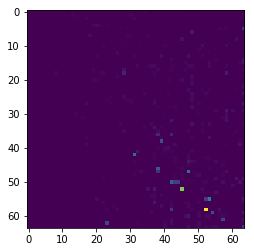

(3200, 64, 64)


In [45]:
# output_image64[:]
plt.imshow(inputImage64[10, :,:,10])
plt.show()
output_image64_intermediate = split256by256StackOnAxis(output_image)
# output_image64 = getOutputYVector(output_image64, numCats)
print(output_image64_intermediate.shape)


In [254]:
print('Accuracy', sum(np.array(accuracies).flatten())/len(accuracies)*100)


Accuracy 100.0


In [48]:
output_image64_intermediate[10].dtype

# plt.imshow(output_image64_intermediate[10])
# plt.show()

dtype('float16')

In [148]:
print(datetime.datetime.now())
WaterWayMask = generateWaterWayMask(waterway, 400)
inputImage, output_image = generateMinibatch(minibatches[10])
# print(inputImage.dtype)
# print(output_image.dtype)
inputImage64, output_image64 = transformTo64(inputImage, output_image,34)
# print(inputImage64.dtype)
# print(output_image64.dtype)
output_image64 = output_image64[WaterWayMask]
inputImage64 = inputImage64[WaterWayMask]
# print(inputImage64.dtype)
# print(output_image64.dtype)
print(datetime.datetime.now())


2018-12-06 18:59:36.103546


/home/muhammadayub/anaconda3/envs/py35/lib/python3.5/site-packages/ipykernel_launcher.py:40: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
/home/muhammadayub/anaconda3/envs/py35/lib/python3.5/site-packages/ipykernel_launcher.py:41: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.


(array([0]),)
(array([0]),)
2018-12-06 18:59:43.296475


In [143]:
print(inputImage64.shape)
print(output_image64.shape)
print(inputImage64.dtype)
print(output_image64.dtype)
print(len(WaterWayMask))

(1600, 64, 64, 26)
(1600, 34)
float64
float64
1600
